$$
{\huge \textbf{Dark-Fiber Charakterisierung}}\\
$$

$$
{\huge \textbf{für entanglement polarisierter QKD}}\\ 
$$

$$
{\normalsize \textbf{Übersicht und Aufbereitung von Messverfahren und Messdaten}}
$$

**Autor:** Laura Komma  
**Datensatz:** Nordhausen - Sundhausen

# Einleitung: Kenngrößen, Messgerät und Datengrundlage

## Ressourcen und Literatur
- [Messdaten](https://zenodo.org/uploads/15183223)
- [Messgerät](https://www.thorlabs.com/_sd.cfm?fileName=MTN007790-D02.pdf&partNumber=PAX1000IR2/M)
- [Abbildung: Poincaré-Kugel](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=14200)

## Kenngrößen: Bedeutung und Einheiten

| Kenngöße | Einheit | Bedeutung |Wertebereiche|
| :-: | :-: | :-: | :-: |
| Time | date hh:mm:ss | absoluter Messzeitpunkt | - |
| Elapsed Time  | hh:mm:ss:ms | relativer Messzeitpunkt | - |
| Normalized s1, s2, s3  | - | Normierte Stokes-Komponenten | -1 ≤ x ≤ 1|
| S0  | mW | Gesamtleistung | - |
| S1, S2, S3  | mW | Stokes-Komponenten | - |
| Azimuth   | ° | Winkel in der Poincaré-Kugel (horizontaler Winkel) | -90° ≤ x ≤ 90° |
| Ellipticity   | ° | Maß für elliptische Polarisation (vertikaler Winkel) | -45° ≤ x ≤ 45° |
| DOP  | % | Degree of Polarization | 0% ≤ x ≤ 100% |
| DOCP  | % | Degree of Circular Polarization (Zirkularitätsmaß) |  0% ≤ x ≤ 100% |
| DOLP  | % | Degree of Linear Polarization (Linearitätsmaß)|  0% ≤ x ≤ 100% |
| Power  | mW / dBm | Gesamtleistung | -60 dBm ≤ x ≤ +10 dBm |
| Pol Power  | mW / dBm | Polarisierter Anteil (= DOP × Gesamtleistung) | -60 dBm ≤ x ≤ +10 dBm |
| Unpol Power  | mW / dBm | Unpolarisierter Anteil (= (1–DOP) × Gesamtleistung)| -60 dBm ≤ x ≤ +10 dBm |
| Phase Difference  | ° | Phasenunterschied zw. Polarisationsmoden | -180° ≤ x ≤ 180° |
|Power-Split-Ratio| - | Leistungsverhältnis zweier Polarisationsrichtungen| 0 ≤ x ≤ 1  |
| Warning  | - | Hinweis für fehlerhafte Messung | - |

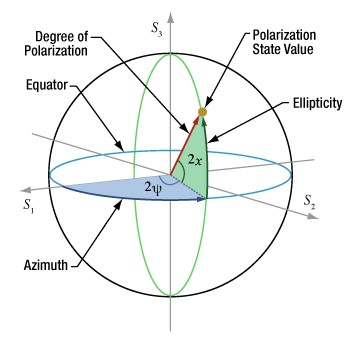

In [1]:
from IPython.display import Image
Image(filename="./img/poincare.jpg")

## Messgerät und Messverfahren

| Kenngöße | Info |
| :-: | :-: |
| Device | PAX1000IR2/M |
| Serial Number | M00773008 |
| Firmware Version | 1.2.1 |
| Software Version | 1.4.2002.183 |
| Wavelength [nm] | 1560 |
| Basic Sample Rate [Hz] | 100 |
| Operating Mode | 0.5 revolutions for one measurement, 2048 points for FFT |

# Aufbereitung der Messdaten
## Verwendete Libraries / Softwaretools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import datetime
import requests

from prettytable import PrettyTable

## Eigene Hilfsfunktionen

In [2]:
def fast_parse_elapsed(s):
    try:
        d, h, m, s, ms = s.replace('.', ':').split(':')
        return pd.Timedelta(days=int(d), hours=int(h), minutes=int(m), seconds=int(s), milliseconds=int(ms))
    except:
        return pd.NaT

## Datenaufbereitungsschritte

In [3]:
filename ='29.11.2024_10d.csv'
skip = 8
sep = ";"

In [4]:
columns = ['Time[date hh:mm:ss] ', ' Elapsed Time [hh:mm:ss:ms]', ' Normalized s 1 ', ' Normalized s 2 ', ' Normalized s 3 ', ' S 0 [mW]', ' S 1 [mW]', ' S 2 [mW]', ' S 3 [mW]', ' Azimuth[°] ', ' Ellipticity[°] ', ' DOP[%] ', ' DOCP[%] ', ' DOLP[%] ', ' Power[mW] ', ' Pol Power[mW] ', ' Unpol Power[mW] ', ' Power[dBm] ', ' Pol Power[dBm] ', ' Unpol Power[dBm] ', ' Power-Split-Ratio ', ' Phase Difference[°] ', ' Warning']
for c in range(len(columns)):
    print(c, ': ', columns[c])

0 :  Time[date hh:mm:ss] 
1 :   Elapsed Time [hh:mm:ss:ms]
2 :   Normalized s 1 
3 :   Normalized s 2 
4 :   Normalized s 3 
5 :   S 0 [mW]
6 :   S 1 [mW]
7 :   S 2 [mW]
8 :   S 3 [mW]
9 :   Azimuth[°] 
10 :   Ellipticity[°] 
11 :   DOP[%] 
12 :   DOCP[%] 
13 :   DOLP[%] 
14 :   Power[mW] 
15 :   Pol Power[mW] 
16 :   Unpol Power[mW] 
17 :   Power[dBm] 
18 :   Pol Power[dBm] 
19 :   Unpol Power[dBm] 
20 :   Power-Split-Ratio 
21 :   Phase Difference[°] 
22 :   Warning


# Analyse der Messdaten
## Fehler (Warning)

In [5]:
warning = pd.read_csv(filename,skiprows=skip, usecols=[columns[22]], sep=sep)

In [6]:
warning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092298 entries, 0 to 7092297
Data columns (total 1 columns):
 #   Column    Dtype  
---  ------    -----  
 0    Warning  float64
dtypes: float64(1)
memory usage: 54.1 MB


In [7]:
warning.isnull().sum()

Warning    7092298
dtype: int64

## Zeitwerte (Time, Elapsed Time)

In [8]:
time = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[1]], sep=sep)

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092298 entries, 0 to 7092297
Data columns (total 2 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Time[date hh:mm:ss]          object
 1    Elapsed Time [hh:mm:ss:ms]  object
dtypes: object(2)
memory usage: 108.2+ MB


In [10]:
time.isnull().sum()

Time[date hh:mm:ss]            0
 Elapsed Time [hh:mm:ss:ms]    0
dtype: int64

In [11]:
time[columns[0]] = pd.to_datetime(time[columns[0]])
time['time_difference'] = time[columns[0]].diff()
time['time_frequency'] =  1 / time['time_difference'].dt.total_seconds()
time['time_difference']

0                            NaT
1         0 days 00:00:00.060000
2         0 days 00:00:00.050000
3         0 days 00:00:00.050000
4         0 days 00:00:00.050000
                   ...          
7092293   0 days 00:00:05.160000
7092294   0 days 00:00:00.040000
7092295   0 days 00:00:00.050000
7092296   0 days 00:00:02.590000
7092297   0 days 00:00:00.470000
Name: time_difference, Length: 7092298, dtype: timedelta64[ns]

In [12]:
time[columns[1]] = time[columns[1]].apply(fast_parse_elapsed)
time['elapsed_time_difference'] = time[columns[1]].diff()
time['elapsed_time_frequency'] =  1 / time['elapsed_time_difference'].dt.total_seconds()
time['elapsed_time_difference']

0                            NaT
1         0 days 00:00:00.060000
2         0 days 00:00:00.048000
3         0 days 00:00:00.056000
4         0 days 00:00:00.052000
                   ...          
7092293   0 days 00:00:05.155000
7092294   0 days 00:00:00.047000
7092295   0 days 00:00:00.048000
7092296   0 days 00:00:02.585000
7092297   0 days 00:00:00.477000
Name: elapsed_time_difference, Length: 7092298, dtype: timedelta64[ns]

In [13]:
t = PrettyTable([' ', 'Time', 'Elapsed Time'])
t.add_row(['Max', time['time_difference'].max(), time['elapsed_time_difference'].max()])
t.add_row(['Min', time['time_difference'].min(),  time['elapsed_time_difference'].min()])
t.add_row(['Mean', time['time_difference'].mean(),  time['elapsed_time_difference'].mean()])
t.add_row(['Std', time['time_difference'].std(),  time['elapsed_time_difference'].std()])
t.add_row(['Most', time['time_difference'].value_counts(dropna=True).idxmax(), time['elapsed_time_difference'].value_counts(dropna=True).idxmax()])
t.add_row(['Mean Frequency', time['time_frequency'].mean(),  time['elapsed_time_frequency'].mean()])

t

+----------------+---------------------------+---------------------------+
|                |            Time           |        Elapsed Time       |
+----------------+---------------------------+---------------------------+
|      Max       |   0 days 00:00:08.440000  |   0 days 00:00:08.433000  |
|      Min       |   0 days 00:00:00.030000  |   0 days 00:00:00.035000  |
|      Mean      | 0 days 00:00:00.059365613 | 0 days 00:00:00.059365613 |
|      Std       | 0 days 00:00:00.043810670 | 0 days 00:00:00.043698223 |
|      Most      |   0 days 00:00:00.050000  |   0 days 00:00:00.051000  |
| Mean Frequency |      18.0609712139089     |     17.991727639966637    |
+----------------+---------------------------+---------------------------+

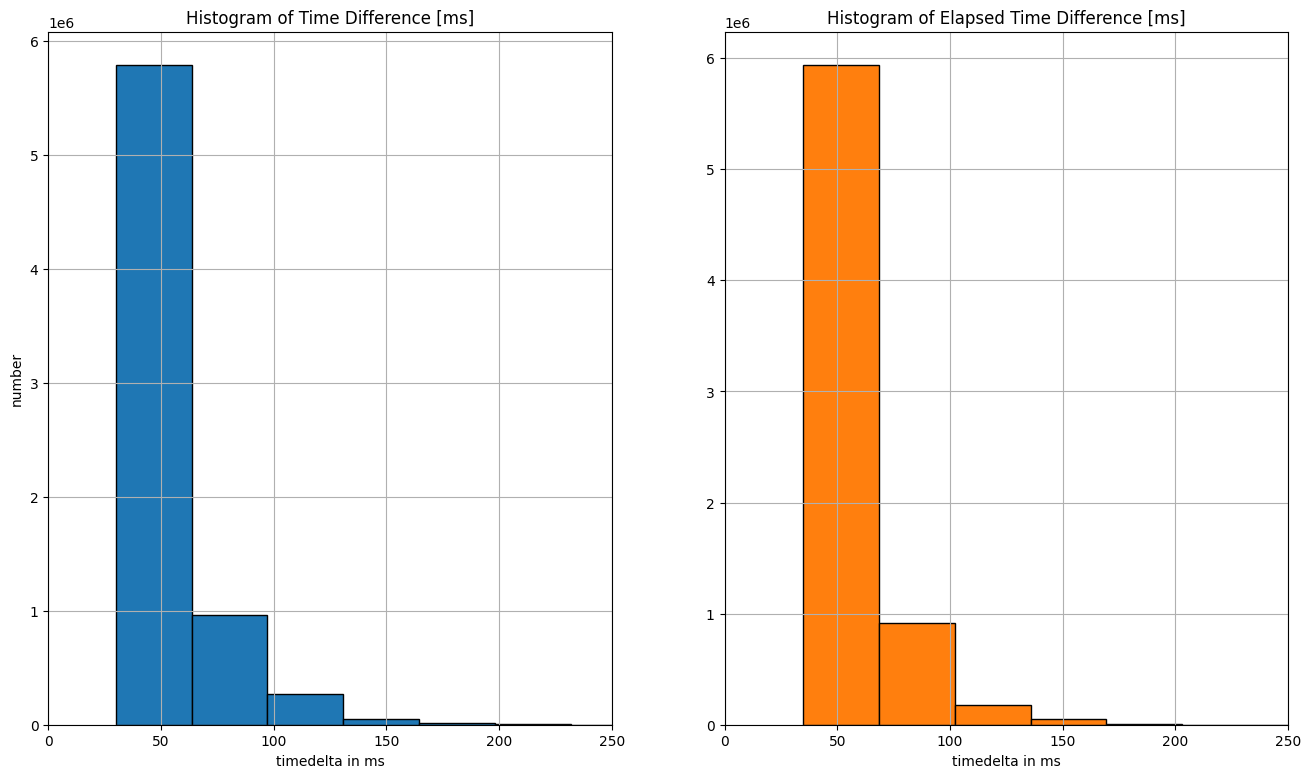

In [14]:
time_difference = time['time_difference'].dt.total_seconds() * 1000
elapsed_time_difference = time['elapsed_time_difference'].dt.total_seconds() * 1000

plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(time_difference, bins=250, color='tab:blue', edgecolor='black')
plt.xlim([0, 250])
plt.grid()
plt.xlabel('timedelta in ms')
plt.ylabel('number') 
plt.title('Histogram of Time Difference [ms]')

plt.subplot(1, 2, 2)
plt.hist(elapsed_time_difference, bins=250, color='tab:orange', edgecolor='black')
plt.xlim([0, 250])
plt.grid()
plt.xlabel('timedelta in ms')
plt.title('Histogram of Elapsed Time Difference [ms]')

plt.show()

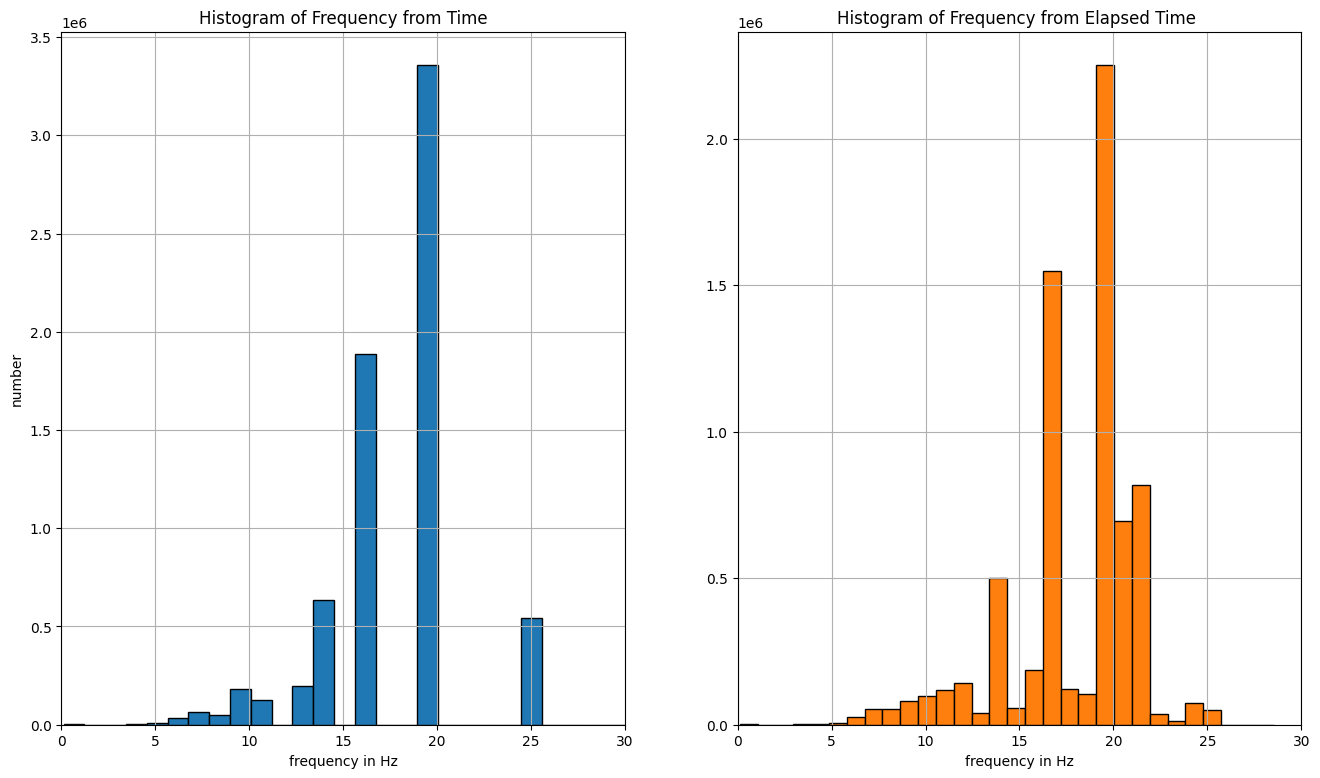

In [15]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(time['time_frequency'], bins=30, color='tab:blue', edgecolor='black')
plt.xlim([0, 30])
plt.grid()
plt.xlabel('frequency in Hz')
plt.ylabel('number') 
plt.title('Histogram of Frequency from Time')

plt.subplot(1, 2, 2)
plt.hist(time['elapsed_time_frequency'], bins=30, color='tab:orange', edgecolor='black')
plt.xlim([0, 30])
plt.grid()
plt.xlabel('frequency in Hz')
plt.title('Histogram of Frequency from Elapsed Time ')

plt.show()

## Polarisationsgrade (DOP, DOCP, DOLP)

In [16]:
degree = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[11], columns[12], columns[13]], sep=sep)

In [17]:
degree[columns[0]] = pd.to_datetime(degree[columns[0]])
degree.set_index(columns[0], inplace=True)

In [18]:
degree.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0    DOP[%]    float64
 1    DOCP[%]   float64
 2    DOLP[%]   float64
dtypes: float64(3)
memory usage: 216.4 MB


In [19]:
degree.isnull().sum()

DOP[%]      0
DOCP[%]     0
DOLP[%]     0
dtype: int64

In [20]:
degree.describe()

DOP[%]       DOCP[%]       DOLP[%] 
count  7.092298e+06  7.092298e+06  7.092298e+06
mean   9.968967e+01  4.793726e+01  8.010235e+01
std    4.684479e+00  2.783318e+01  2.170073e+01
min   -3.703300e+03  0.000000e+00  5.000000e-02
25%    9.737000e+01  2.435000e+01  6.955000e+01
50%    9.950000e+01  4.698000e+01  8.768000e+01
75%    1.021500e+02  7.092000e+01  9.591000e+01
max    2.895590e+03  9.977200e+02  3.700080e+03

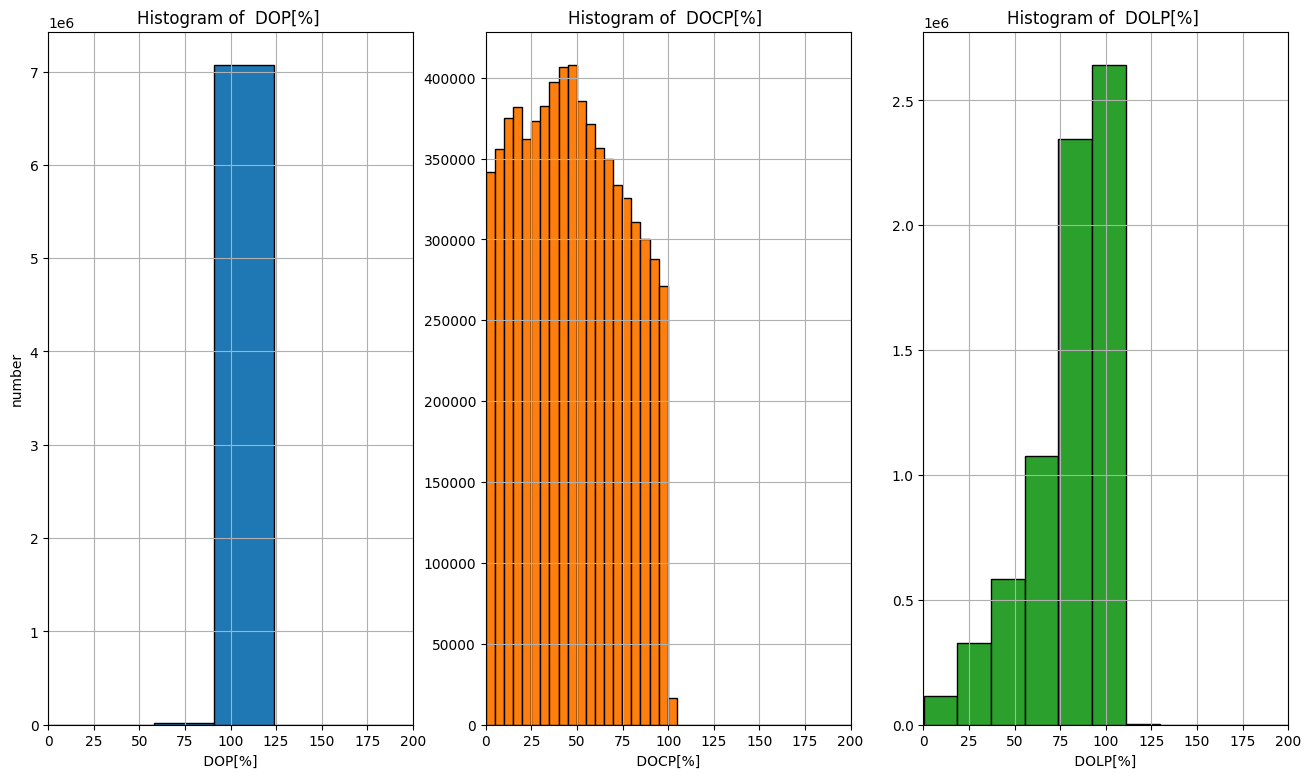

In [23]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(degree[columns[11]], bins=200, color='tab:blue', edgecolor='black')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[11])
plt.ylabel('number') 
plt.title(f'Histogram of {columns[11]}')

plt.subplot(1, 3, 2)
plt.hist(degree[columns[12]], bins=200, color='tab:orange', edgecolor='black')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[12])
plt.title(f'Histogram of {columns[12]}')

plt.subplot(1, 3, 3)
plt.hist(degree[columns[13]], bins=200, color='tab:green', edgecolor='black')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[13])
plt.title(f'Histogram of {columns[13]}')

plt.show()

In [24]:
one_second = datetime.timedelta(seconds=1)
one_minute = datetime.timedelta(minutes=1)
one_hour = datetime.timedelta(hours=1)
one_day = datetime.timedelta(days=1)

start_time = datetime.datetime.strptime(str(degree.index[0]), '%Y-%m-%d %H:%M:%S.%f')
end_time_second = start_time + one_second
end_time_minute = start_time + one_minute
end_time_hour = start_time + one_hour
end_time_day = start_time + one_day

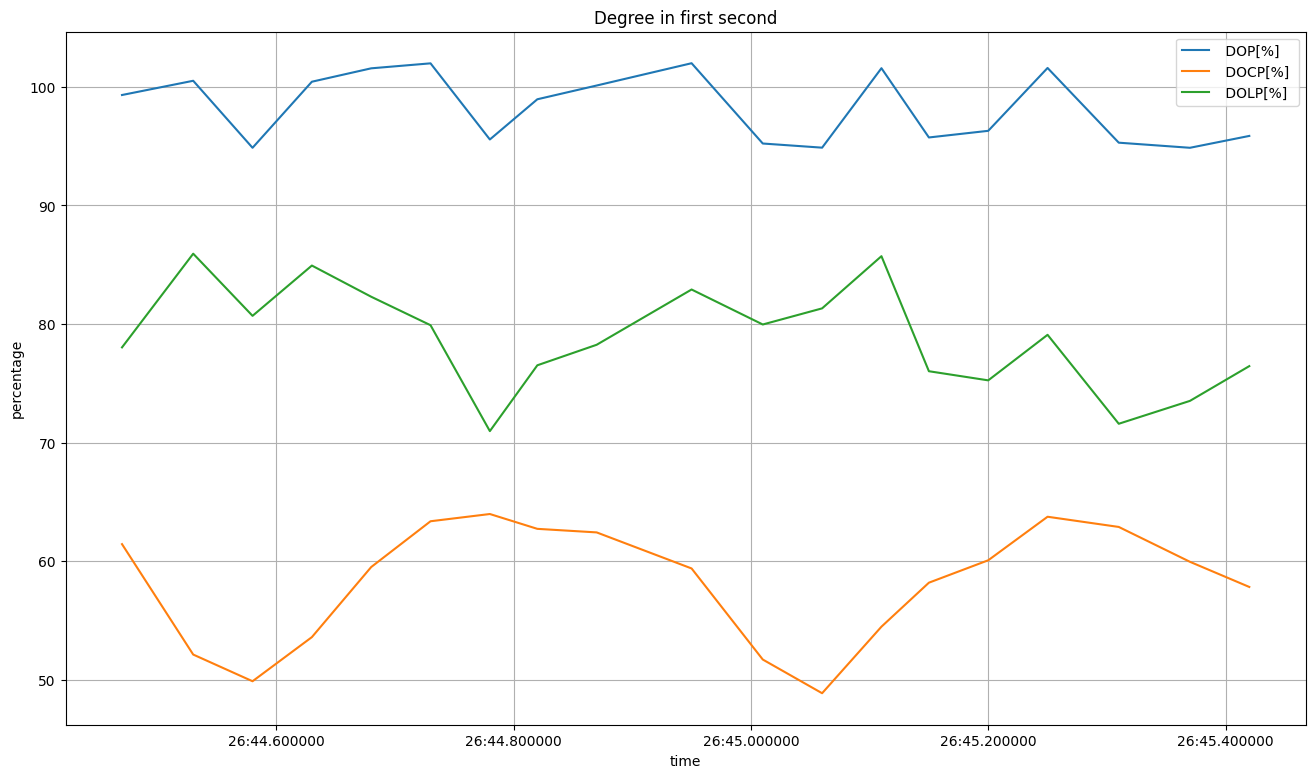

In [25]:
first_second = degree.loc[(degree.index >= start_time) & (degree.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[11]], label = columns[11])
plt.plot(first_second.index, first_second[columns[12]], label = columns[12])
plt.plot(first_second.index, first_second[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first second')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

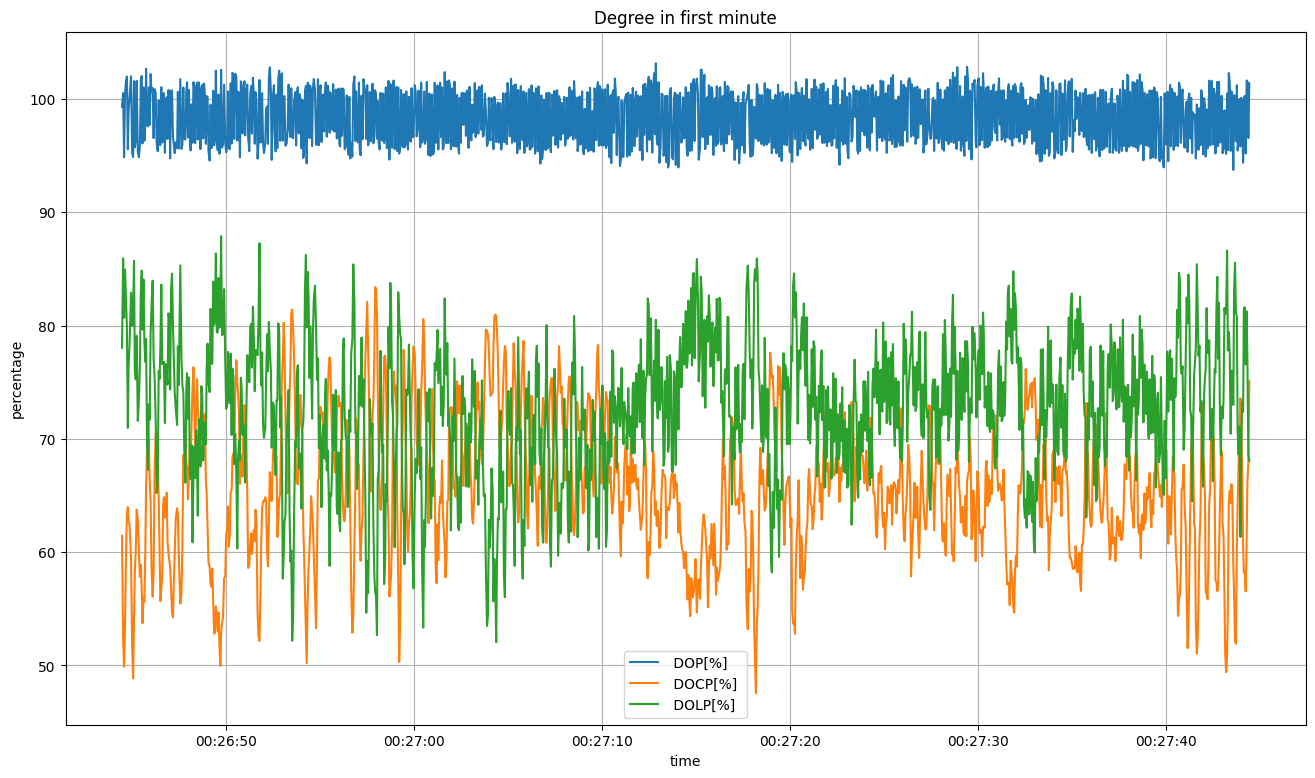

In [26]:
first_minute = degree.loc[(degree.index >= start_time) & (degree.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[11]], label = columns[11])
plt.plot(first_minute.index, first_minute[columns[12]], label = columns[12])
plt.plot(first_minute.index, first_minute[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first minute')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

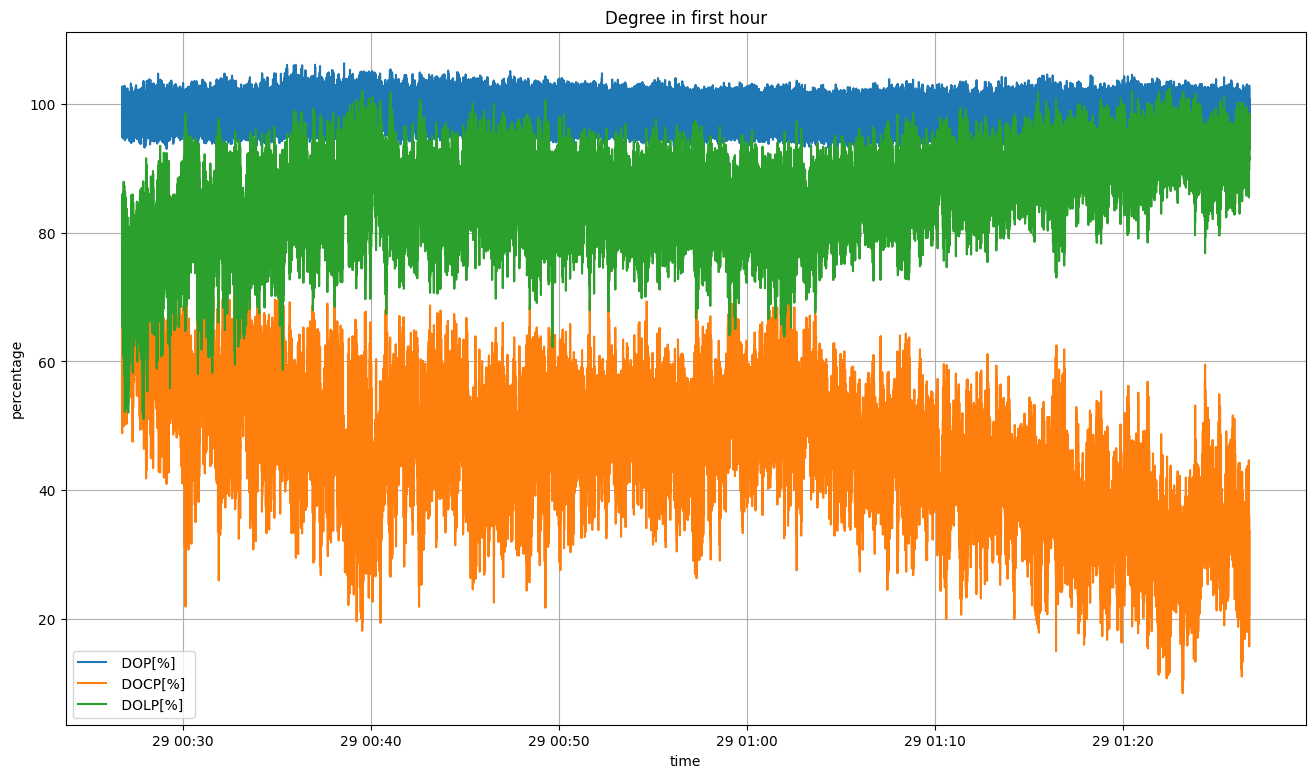

In [27]:
first_hour = degree.loc[(degree.index >= start_time) & (degree.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[11]], label = columns[11])
plt.plot(first_hour.index, first_hour[columns[12]], label = columns[12])
plt.plot(first_hour.index, first_hour[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first hour')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

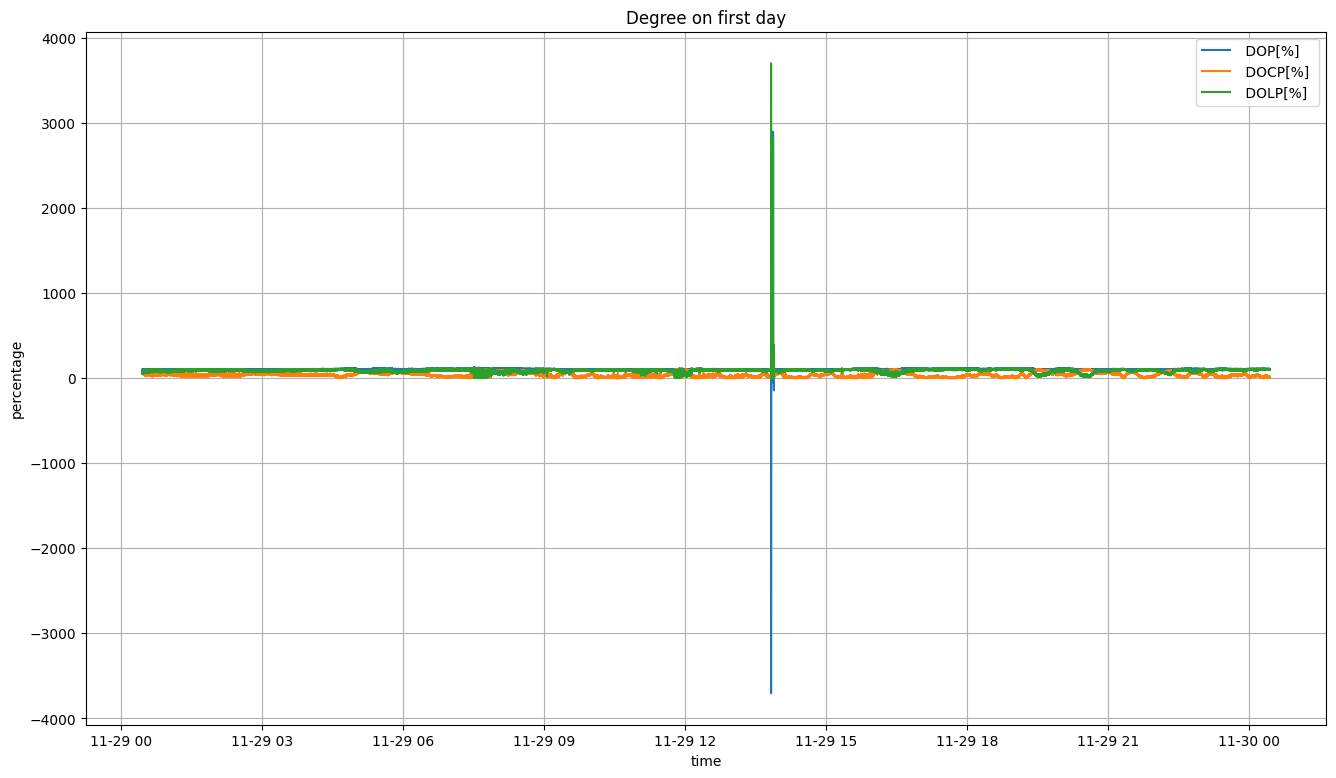

In [28]:
first_day = degree.loc[(degree.index >= start_time) & (degree.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[11]], label = columns[11])
plt.plot(first_day.index, first_day[columns[12]], label = columns[12])
plt.plot(first_day.index, first_day[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree on first day')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

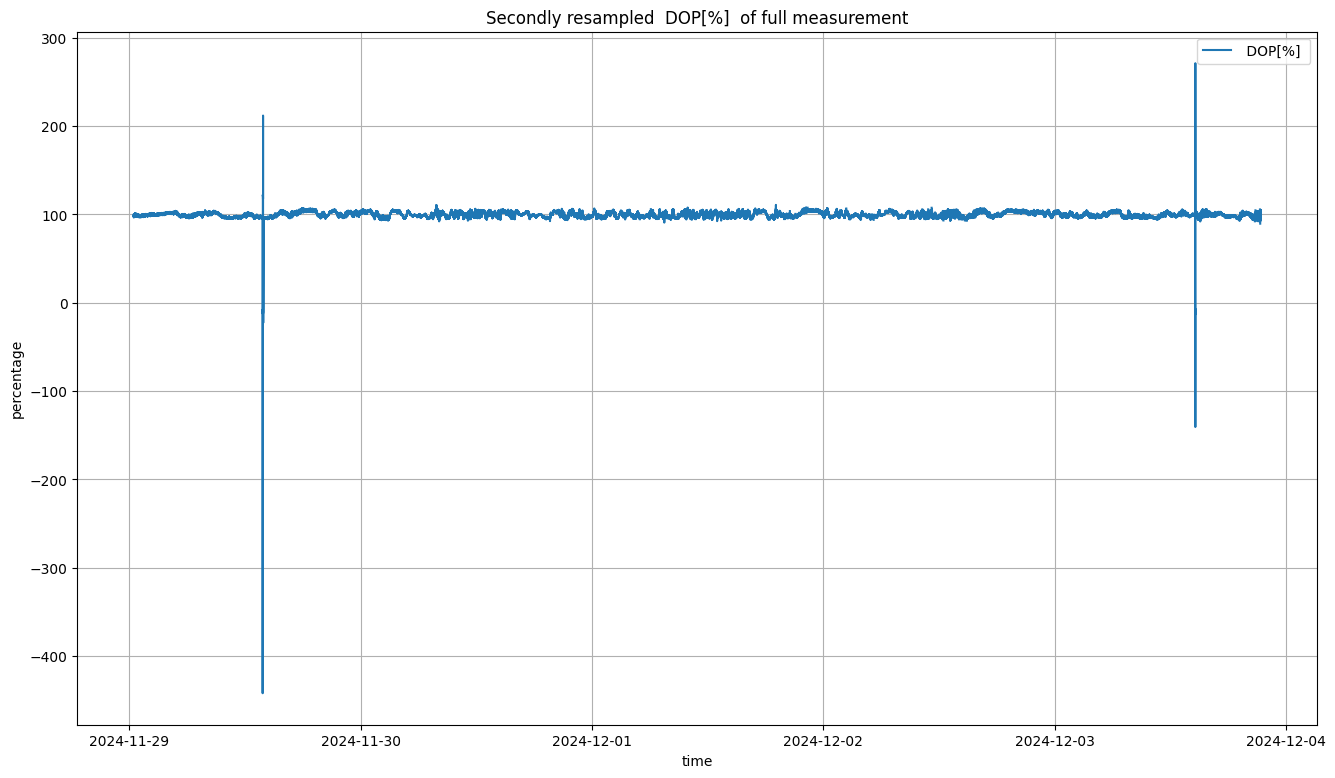

In [29]:
degree_seconds_resample = degree.resample('s').mean()

plt.figure(figsize = (16,9))
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[11]], label = columns[11])
plt.grid()
plt.legend(loc = 'best')
plt.title(f'Secondly resampled {columns[11]} of full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

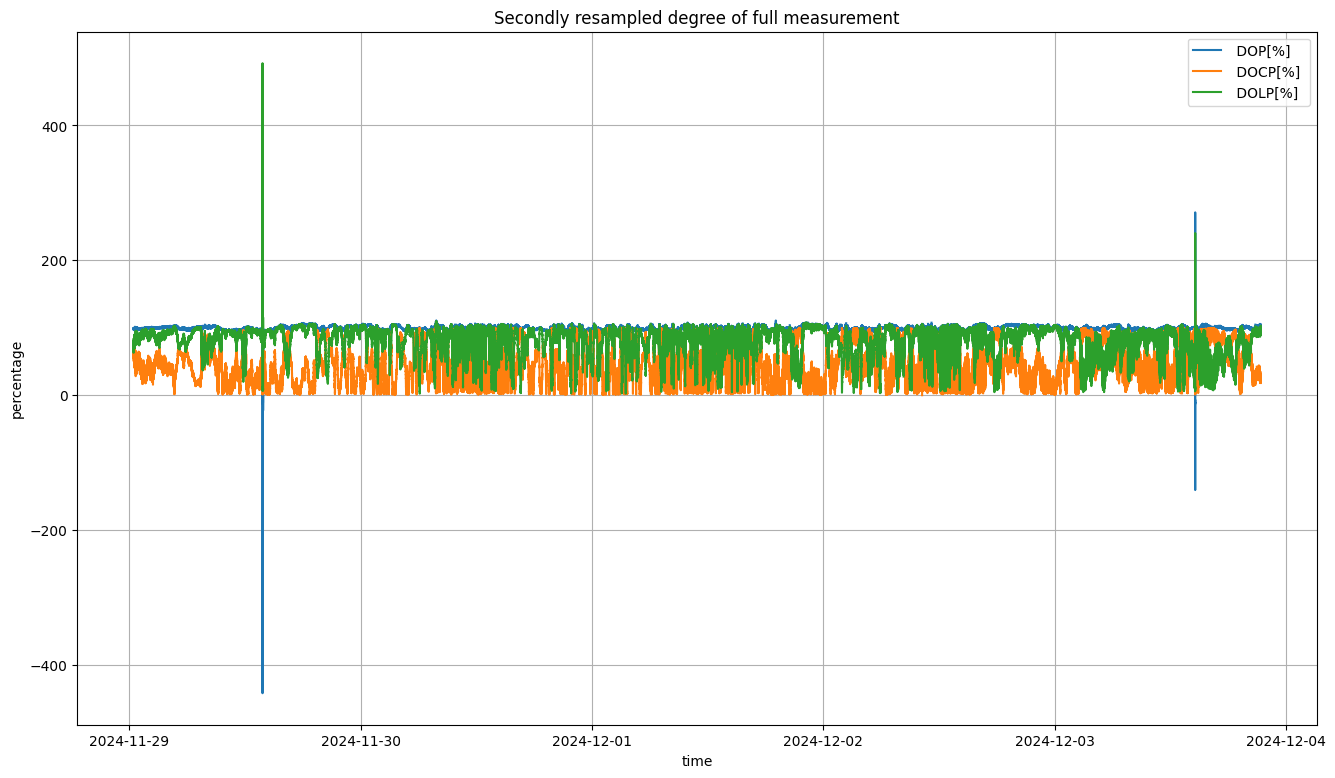

In [30]:
plt.figure(figsize = (16,9))
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[11]], label = columns[11])
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[12]], label = columns[12])
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled degree of full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

## Energie (Power, Pol Power, Unpol Power [mW/dBm])

In [31]:
power_mw = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[14], columns[15], columns[16]], sep=sep)

In [32]:
power_mw[columns[0]] = pd.to_datetime(power_mw[columns[0]])
power_mw.set_index(columns[0], inplace=True)

In [33]:
power_mw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0    Power[mW]         float64
 1    Pol Power[mW]     float64
 2    Unpol Power[mW]   float64
dtypes: float64(3)
memory usage: 216.4 MB


In [34]:
power_mw.isnull().sum()

Power[mW]           0
Pol Power[mW]       0
Unpol Power[mW]     0
dtype: int64

In [35]:
power_mw.describe()

Power[mW]   Pol Power[mW]   Unpol Power[mW] 
count  7.092298e+06    7.092298e+06      7.092298e+06
mean   2.386558e-01    2.378043e-01      8.514209e-04
std    1.068249e-02    7.764705e-03      7.812574e-03
min   -2.843000e-04    1.245000e-06     -7.365000e-02
25%    2.331000e-01    2.350000e-01     -5.019000e-03
50%    2.393000e-01    2.382000e-01      1.185000e-03
75%    2.450000e-01    2.410000e-01      6.408000e-03
max    2.754000e-01    2.882000e-01      7.396000e-02

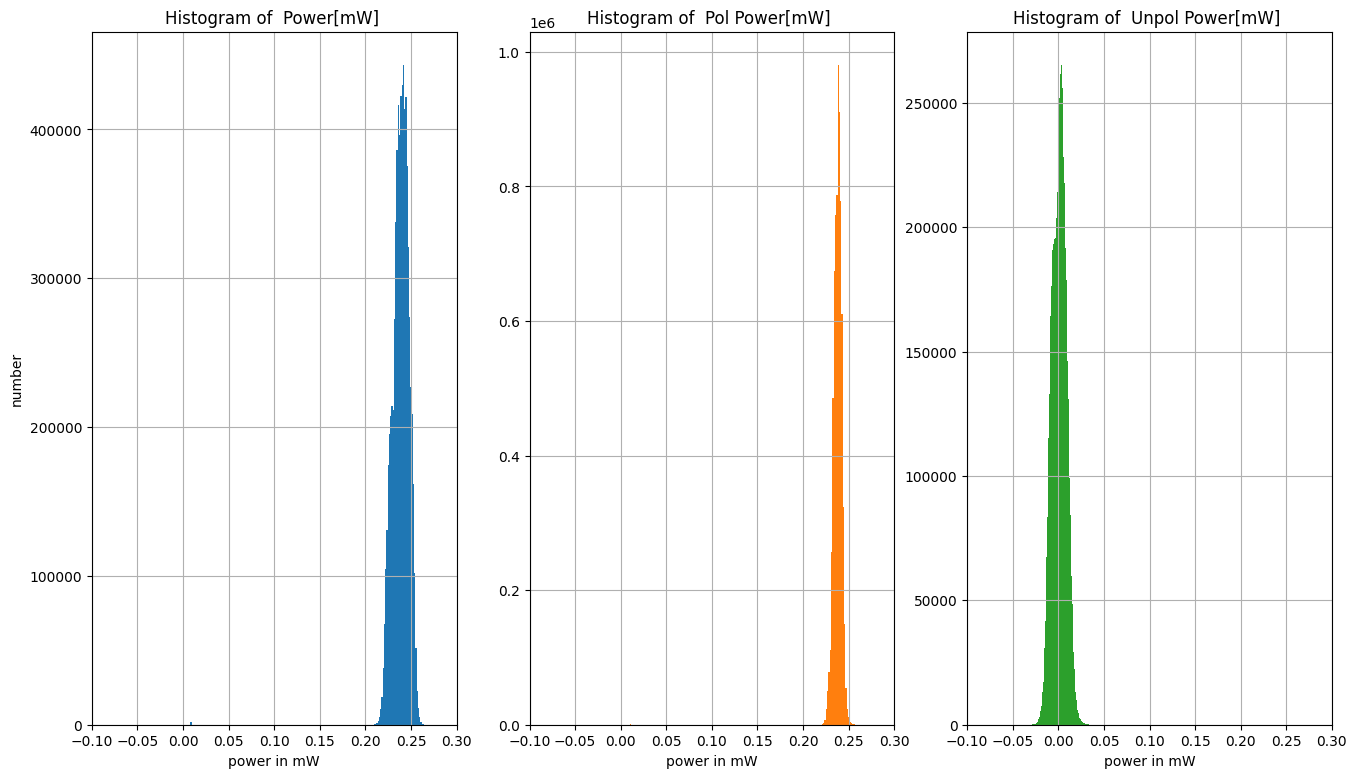

In [36]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(power_mw[columns[14]], bins=200, color='tab:blue')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.ylabel('number') 
plt.title(f'Histogram of {columns[14]}')

plt.subplot(1, 3, 2)
plt.hist(power_mw[columns[15]], bins=200, color='tab:orange')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.title(f'Histogram of {columns[15]}')

plt.subplot(1, 3, 3)
plt.hist(power_mw[columns[16]], bins=200, color='tab:green')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.title(f'Histogram of {columns[16]}')

plt.show()

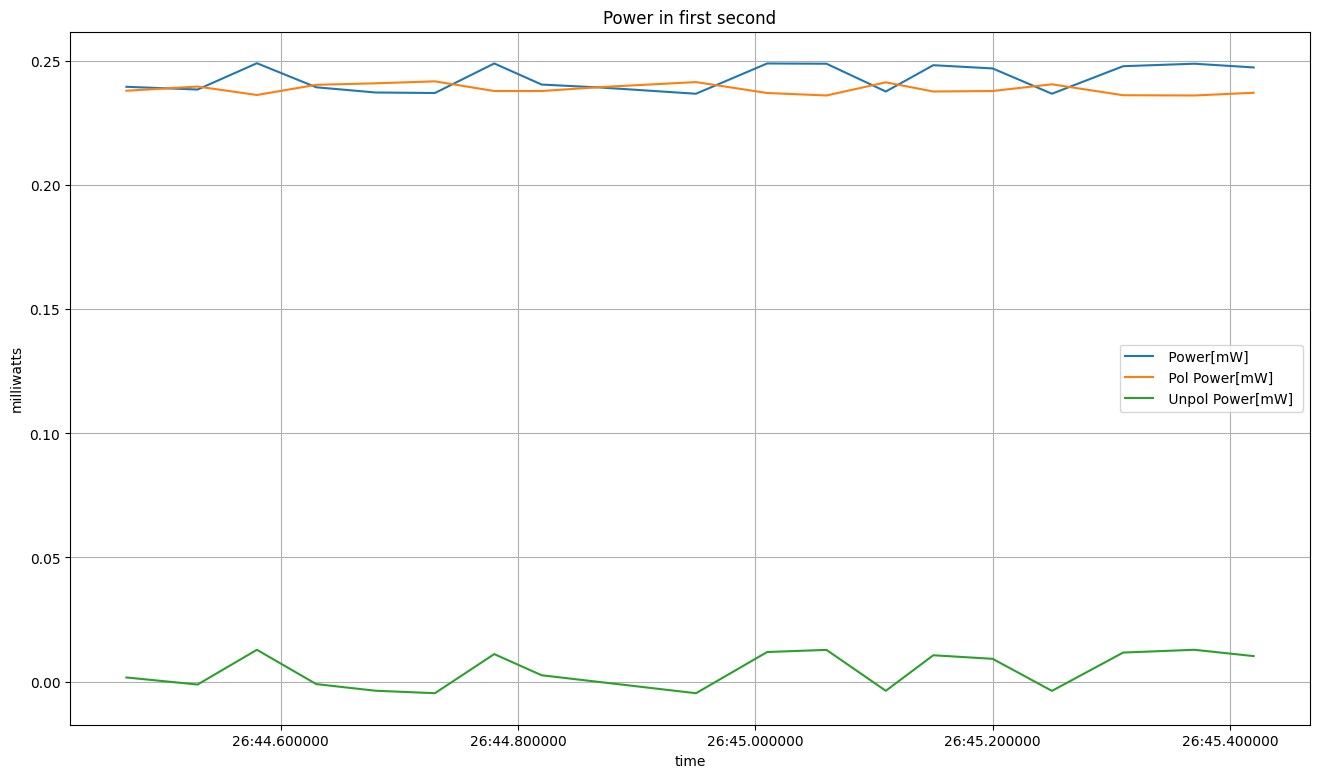

In [37]:
first_second = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[14]], label = columns[14])
plt.plot(first_second.index, first_second[columns[15]], label = columns[15])
plt.plot(first_second.index, first_second[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first second')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

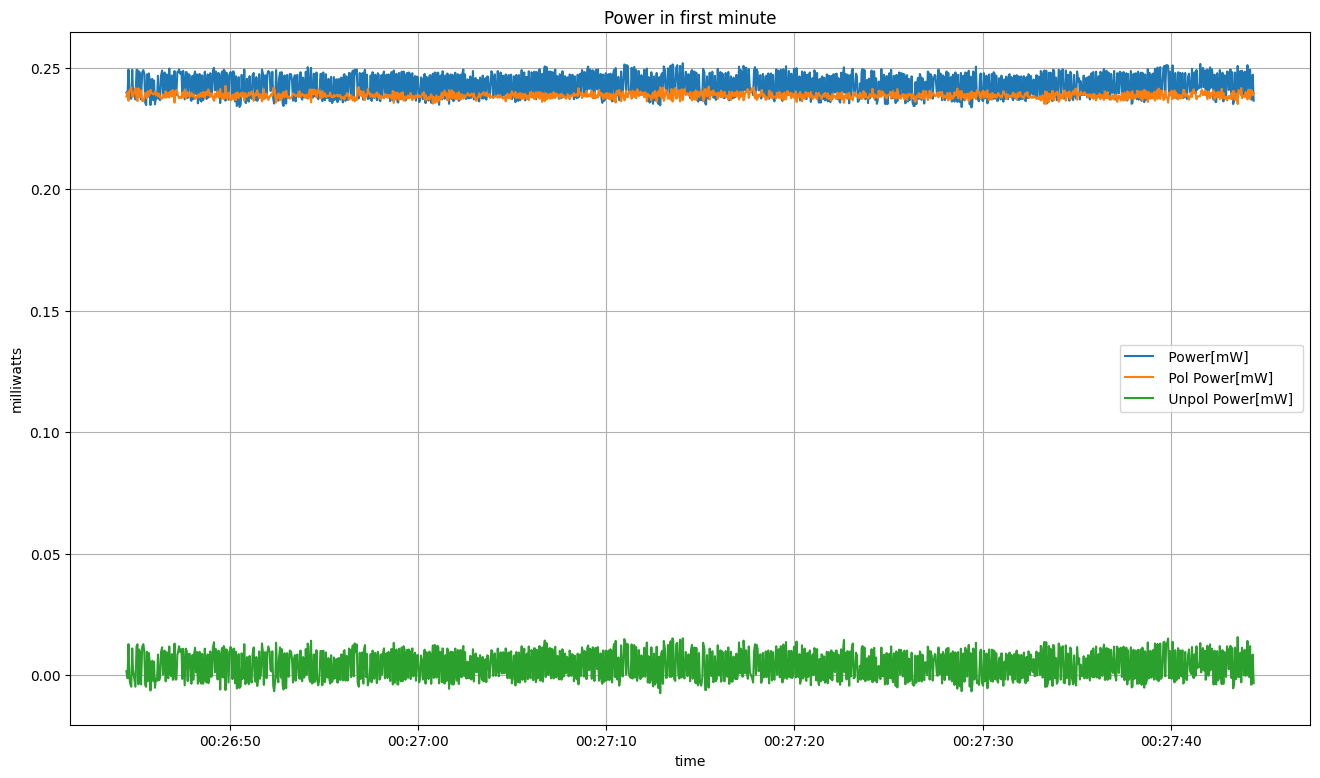

In [38]:
first_minute = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[14]], label = columns[14])
plt.plot(first_minute.index, first_minute[columns[15]], label = columns[15])
plt.plot(first_minute.index, first_minute[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first minute')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

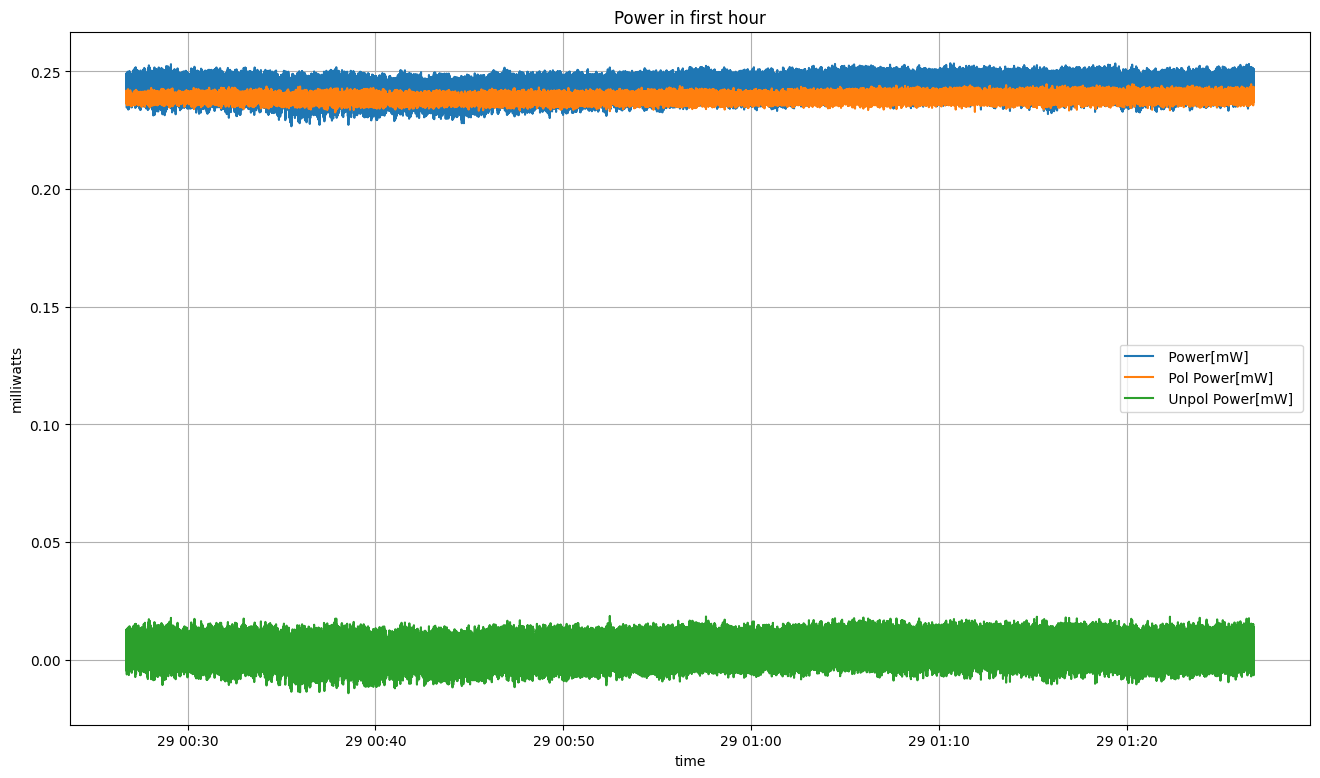

In [39]:
first_hour = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[14]], label = columns[14])
plt.plot(first_hour.index, first_hour[columns[15]], label = columns[15])
plt.plot(first_hour.index, first_hour[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first hour')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

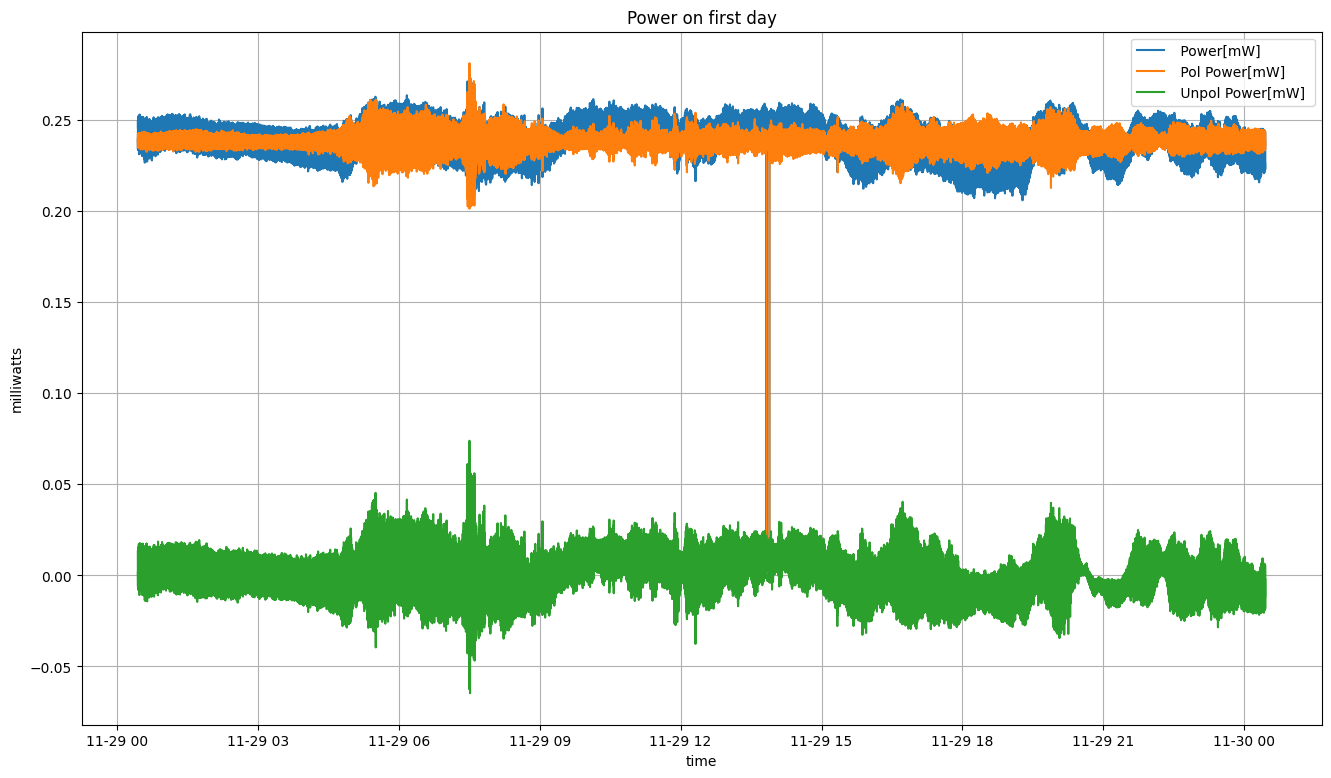

In [40]:
first_day = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[14]], label = columns[14])
plt.plot(first_day.index, first_day[columns[15]], label = columns[15])
plt.plot(first_day.index, first_day[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power on first day')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

In [41]:
power_mw_seconds_resample = power_mw.resample('s').mean()

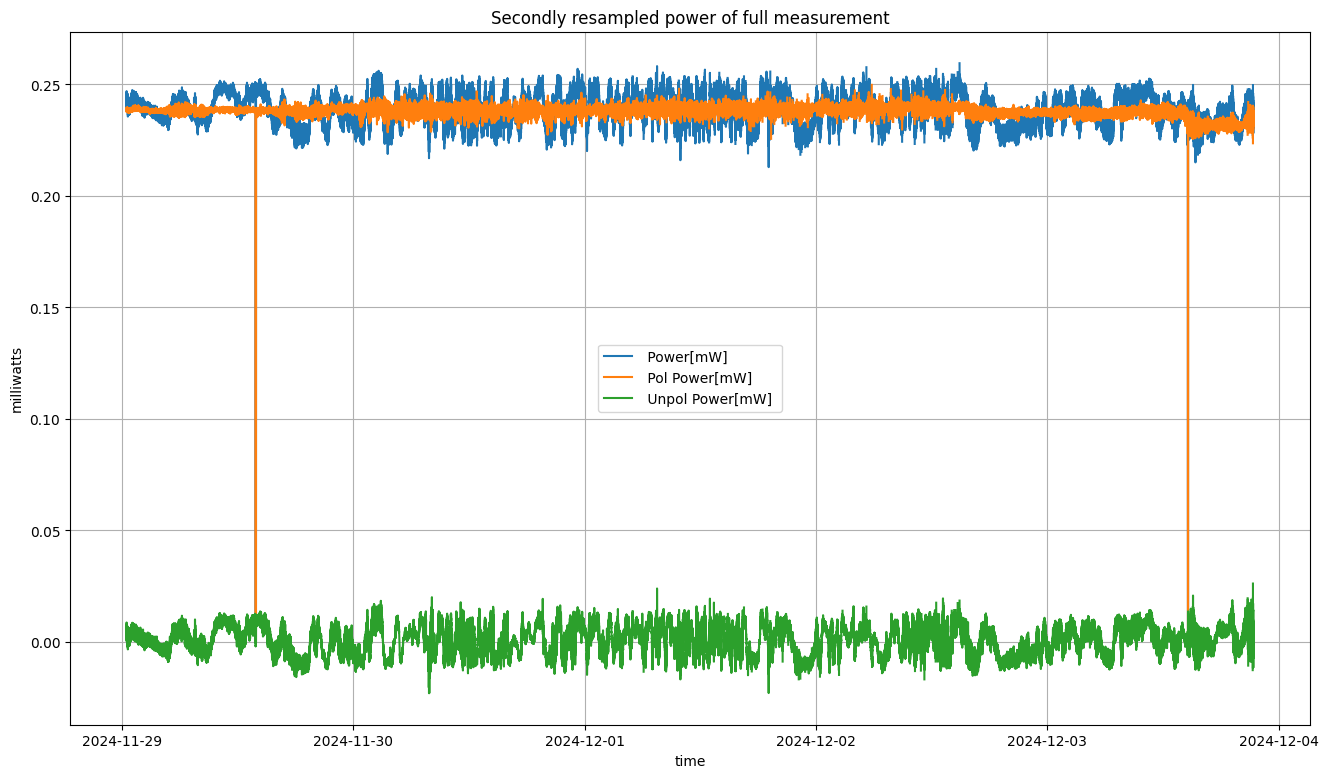

In [42]:
plt.figure(figsize = (16,9))
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[14]], label = columns[14])
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[15]], label = columns[15])
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled power of full measurement')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

In [43]:
power_dbm = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[17], columns[18], columns[19]], sep=sep)

In [44]:
power_dbm[columns[0]] = pd.to_datetime(power_dbm[columns[0]])
power_dbm.set_index(columns[0], inplace=True)

In [45]:
power_dbm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 3 columns):
 #   Column              Dtype  
---  ------              -----  
 0    Power[dBm]         float64
 1    Pol Power[dBm]     float64
 2    Unpol Power[dBm]   float64
dtypes: float64(3)
memory usage: 216.4 MB


In [46]:
power_dbm.isnull().sum()

Power[dBm]           0
Pol Power[dBm]       0
Unpol Power[dBm]     0
dtype: int64

In [47]:
power_dbm.describe()

Power[dBm]   Pol Power[dBm]   Unpol Power[dBm] 
count  7.092298e+06     7.092298e+06       7.092298e+06
mean  -6.275016e+00    -6.260080e+00      -5.751649e+01
std    2.178382e+00     9.656586e-01       3.821717e+01
min   -9.999000e+01    -5.904900e+01      -9.999000e+01
25%   -6.324000e+00    -6.289000e+00      -9.999000e+01
50%   -6.210000e+00    -6.230000e+00      -2.926400e+01
75%   -6.108000e+00    -6.181000e+00      -2.193300e+01
max   -5.601000e+00    -5.403000e+00      -1.131000e+01

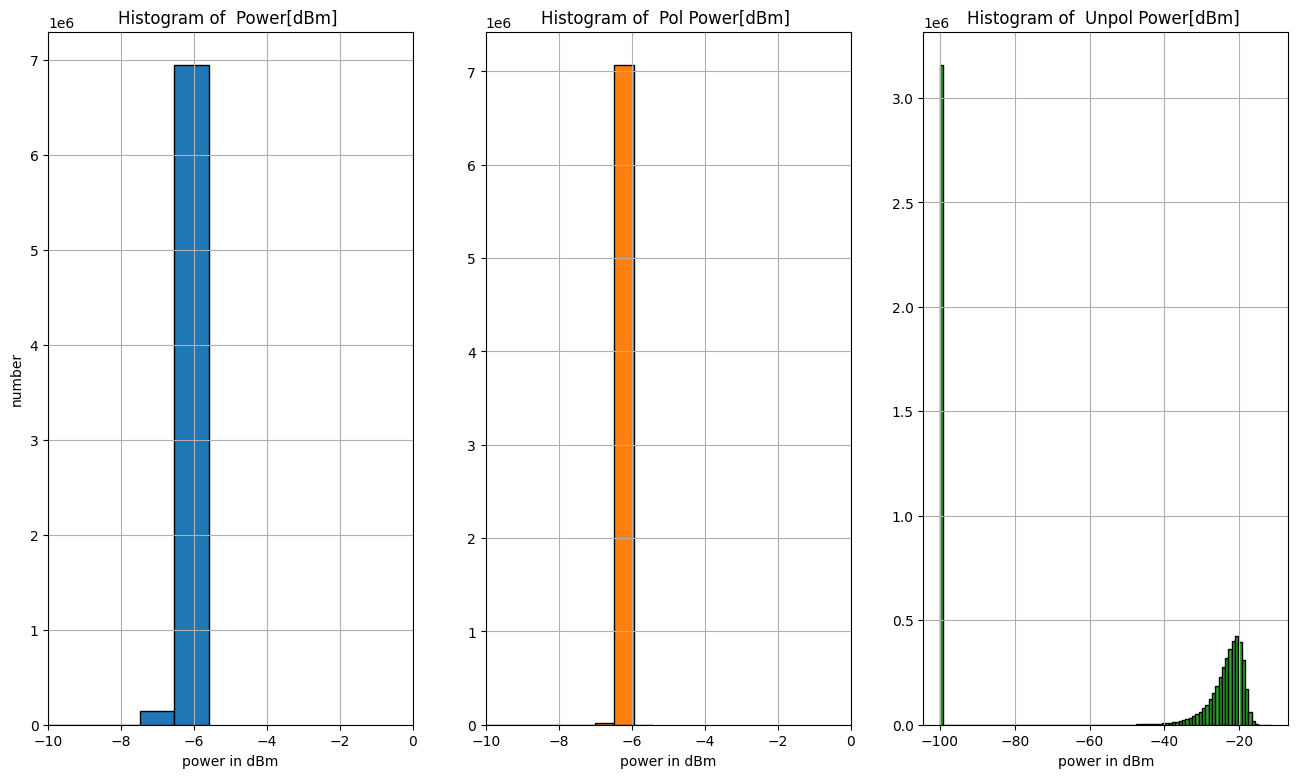

In [48]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(power_dbm[columns[17]], bins=100, color='tab:blue', edgecolor='black')
plt.xlim([-10, 0])
plt.grid()
plt.xlabel('power in dBm')
plt.ylabel('number') 
plt.title(f'Histogram of {columns[17]}')

plt.subplot(1, 3, 2)
plt.hist(power_dbm[columns[18]], bins=100, color='tab:orange', edgecolor='black')
plt.xlim([-10, 0])
plt.grid()
plt.xlabel('power in dBm')
plt.title(f'Histogram of {columns[18]}')

plt.subplot(1, 3, 3)
plt.hist(power_dbm[columns[19]], bins=100, color='tab:green', edgecolor='black')
plt.grid()
plt.xlabel('power in dBm')
plt.title(f'Histogram of {columns[19]}')

plt.show()

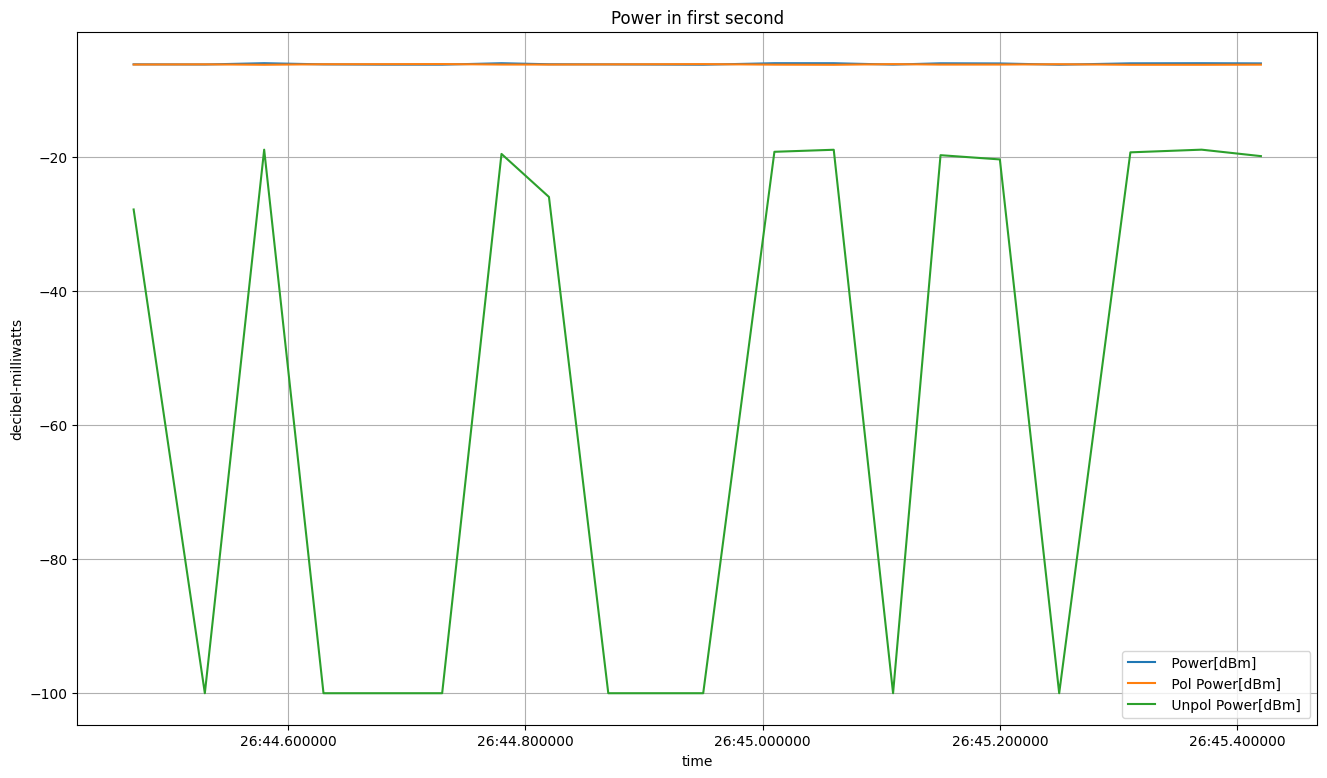

In [49]:
first_second = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[17]], label = columns[17])
plt.plot(first_second.index, first_second[columns[18]], label = columns[18])
plt.plot(first_second.index, first_second[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first second')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

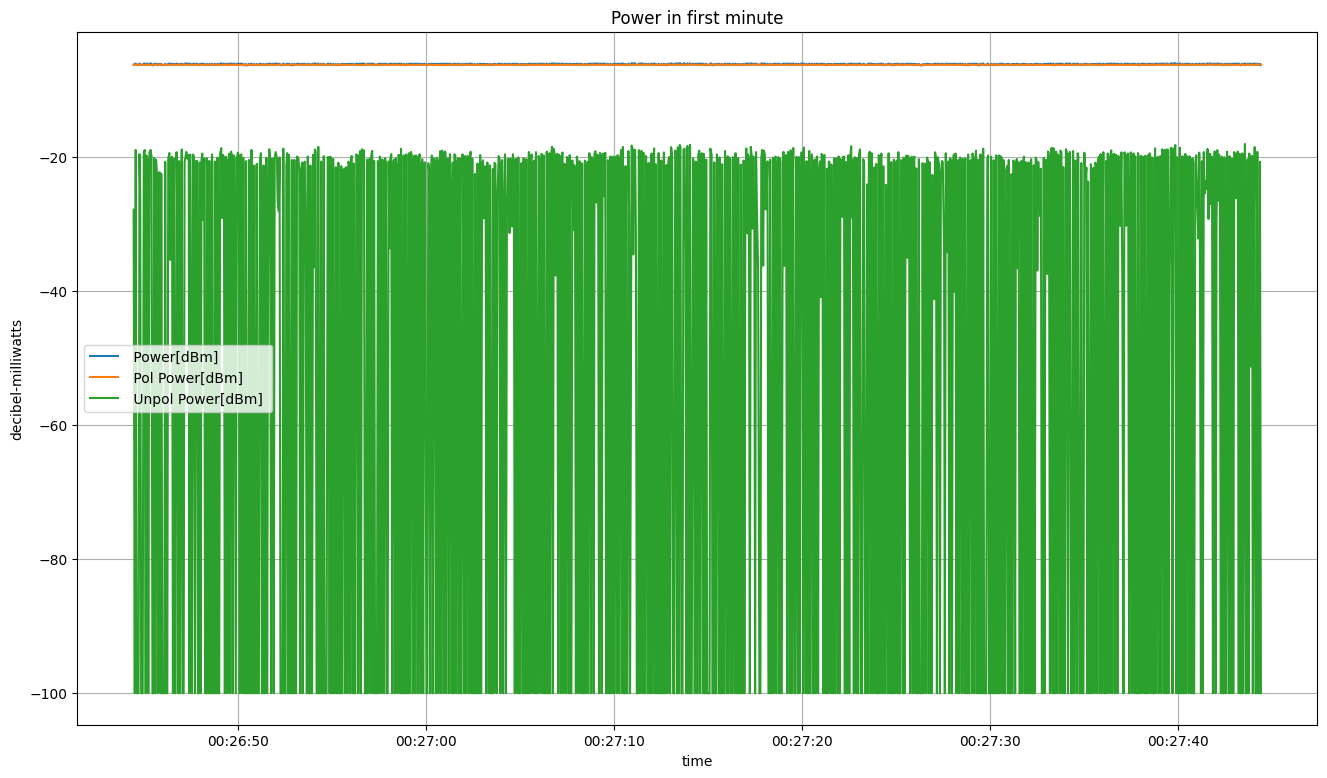

In [50]:
first_minute = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[17]], label = columns[17])
plt.plot(first_minute.index, first_minute[columns[18]], label = columns[18])
plt.plot(first_minute.index, first_minute[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first minute')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

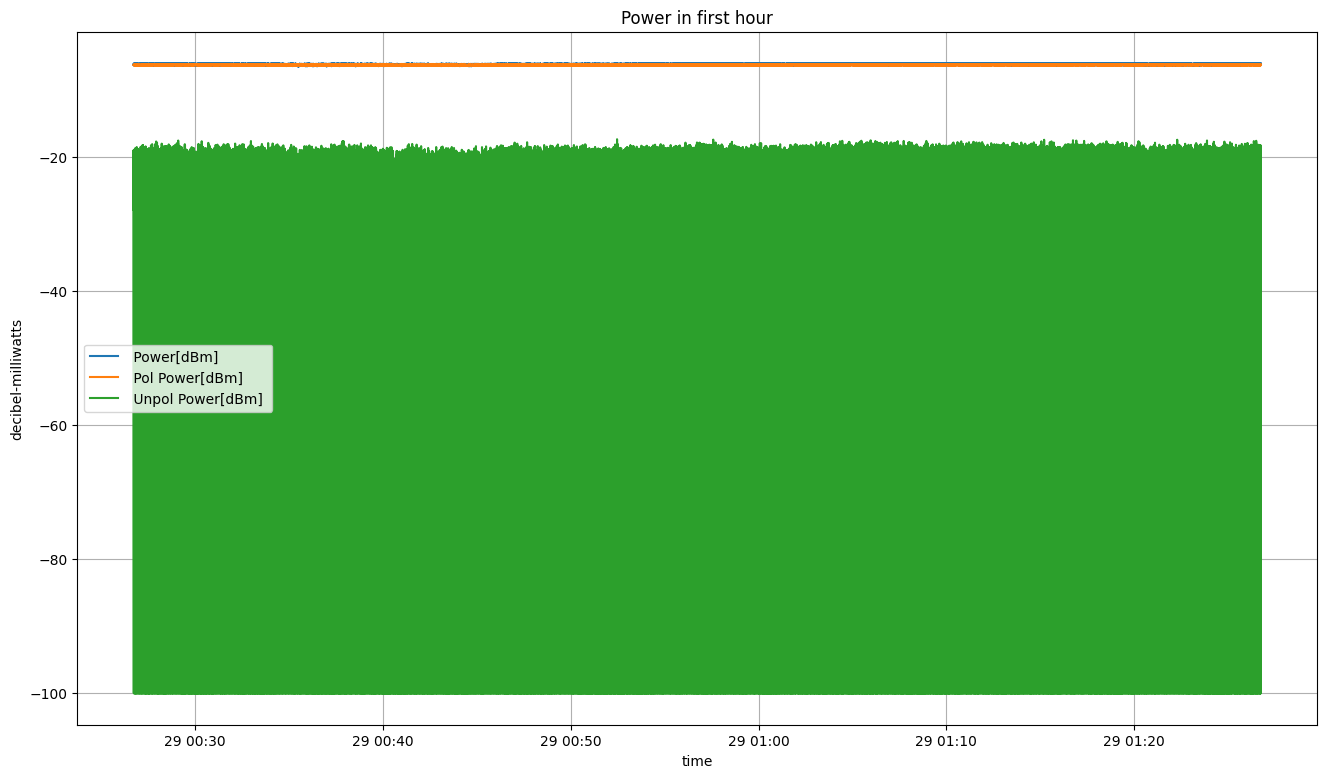

In [51]:
first_hour = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[17]], label = columns[17])
plt.plot(first_hour.index, first_hour[columns[18]], label = columns[18])
plt.plot(first_hour.index, first_hour[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first hour')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

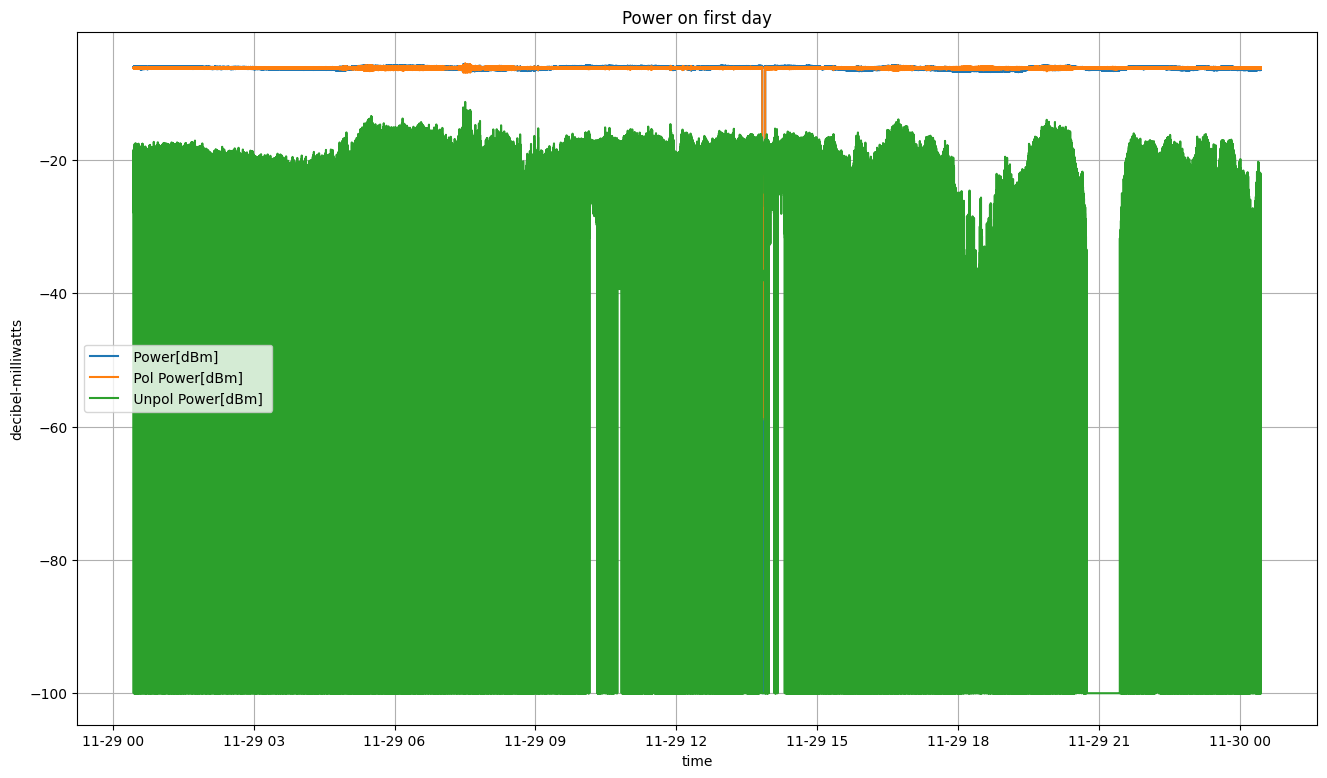

In [52]:
first_day = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[17]], label = columns[17])
plt.plot(first_day.index, first_day[columns[18]], label = columns[18])
plt.plot(first_day.index, first_day[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power on first day')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

In [53]:
power_dbm_seconds_resample = power_dbm.resample('s').mean()

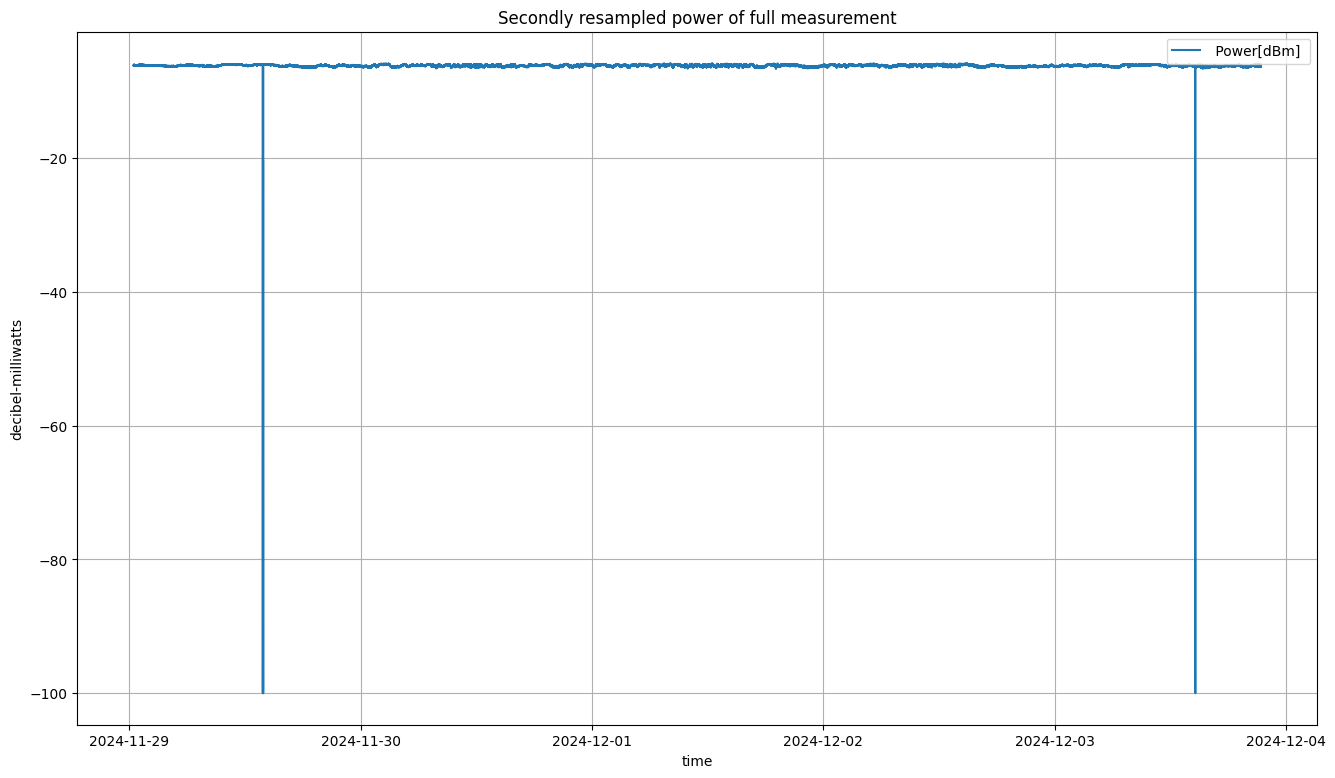

In [54]:
plt.figure(figsize = (16,9))
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[17]], label = columns[17])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled power of full measurement')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

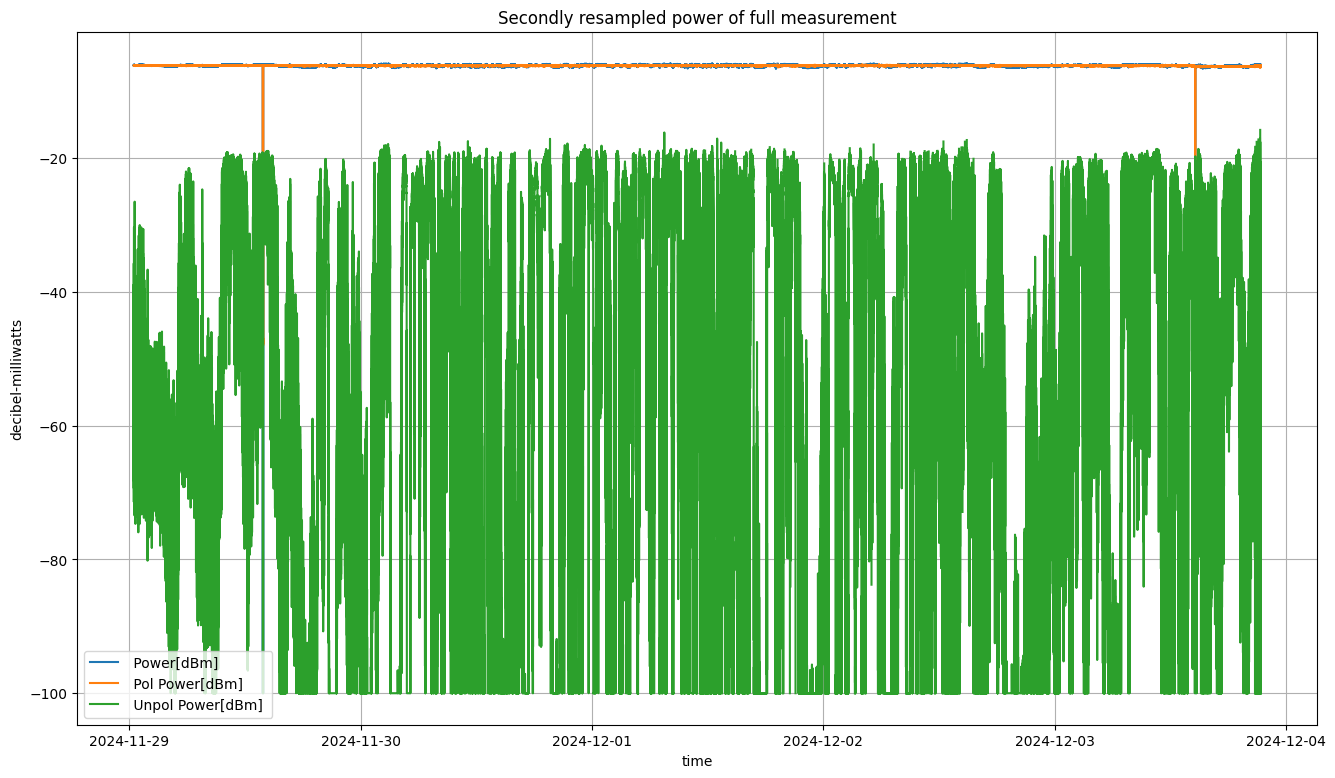

In [55]:
plt.figure(figsize = (16,9))
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[17]], label = columns[17])
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[18]], label = columns[18])
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled power of full measurement')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

## Winkel (Azimuth, Ellipticity)

In [56]:
angle = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[9], columns[10]], sep=sep)

In [57]:
angle[columns[0]] = pd.to_datetime(angle[columns[0]])
angle.set_index(columns[0], inplace=True)

In [58]:
angle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0    Azimuth[°]       float64
 1    Ellipticity[°]   float64
dtypes: float64(2)
memory usage: 162.3 MB


In [59]:
angle.isnull().sum()

Azimuth[°]         0
Ellipticity[°]     0
dtype: int64

In [60]:
angle.describe()

Azimuth[°]   Ellipticity[°] 
count  7.092298e+06     7.092298e+06
mean   5.349416e+00    -3.838762e+00
std    4.483804e+01     1.833112e+01
min   -9.000000e+01    -4.498000e+01
25%   -2.413000e+01    -1.805000e+01
50%    7.080000e+00    -4.300000e+00
75%    3.522000e+01     1.001000e+01
max    9.000000e+01     4.498000e+01

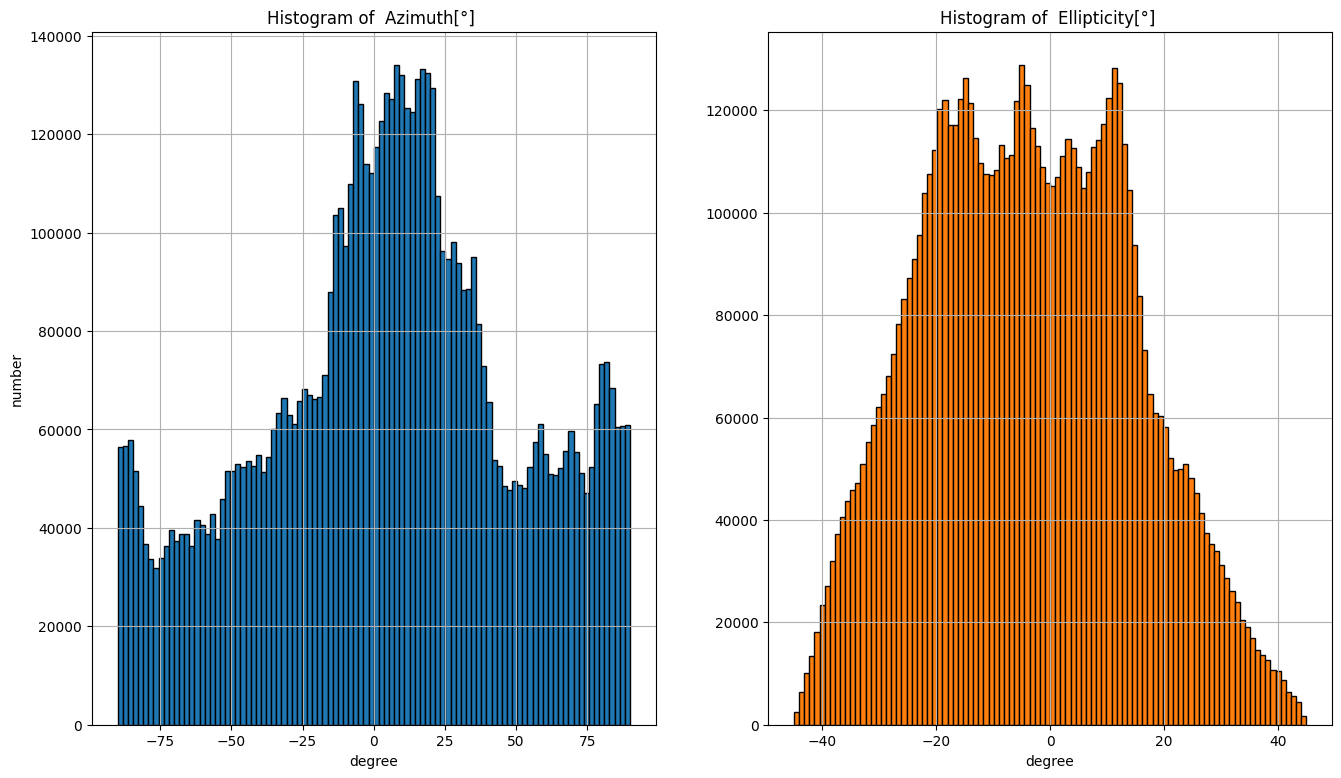

In [61]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(angle[columns[9]], bins=100, color='tab:blue', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.ylabel('number') 
plt.title(f'Histogram of {columns[9]}')

plt.subplot(1, 2, 2)
plt.hist(angle[columns[10]], bins=100, color='tab:orange', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.title(f'Histogram of {columns[10]}')

plt.show()

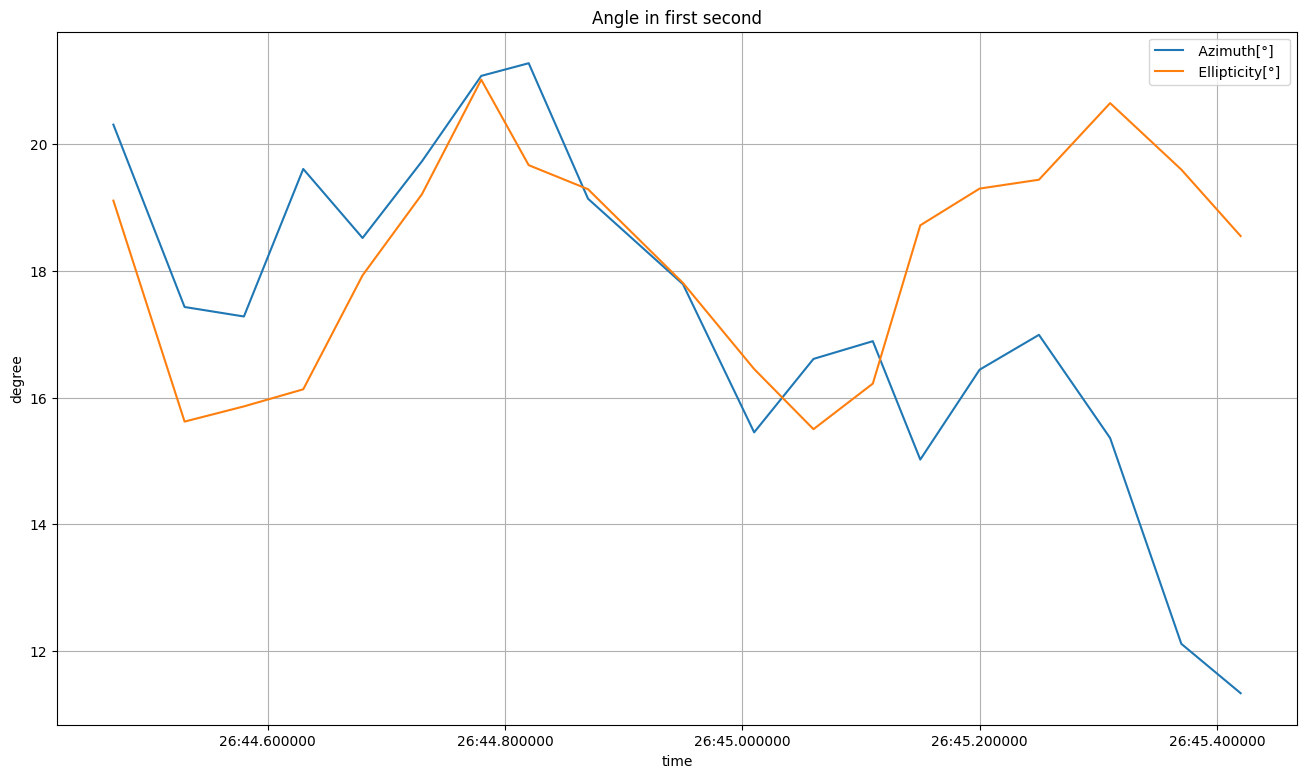

In [62]:
first_second = angle.loc[(angle.index >= start_time) & (angle.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[9]], label = columns[9])
plt.plot(first_second.index, first_second[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first second')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

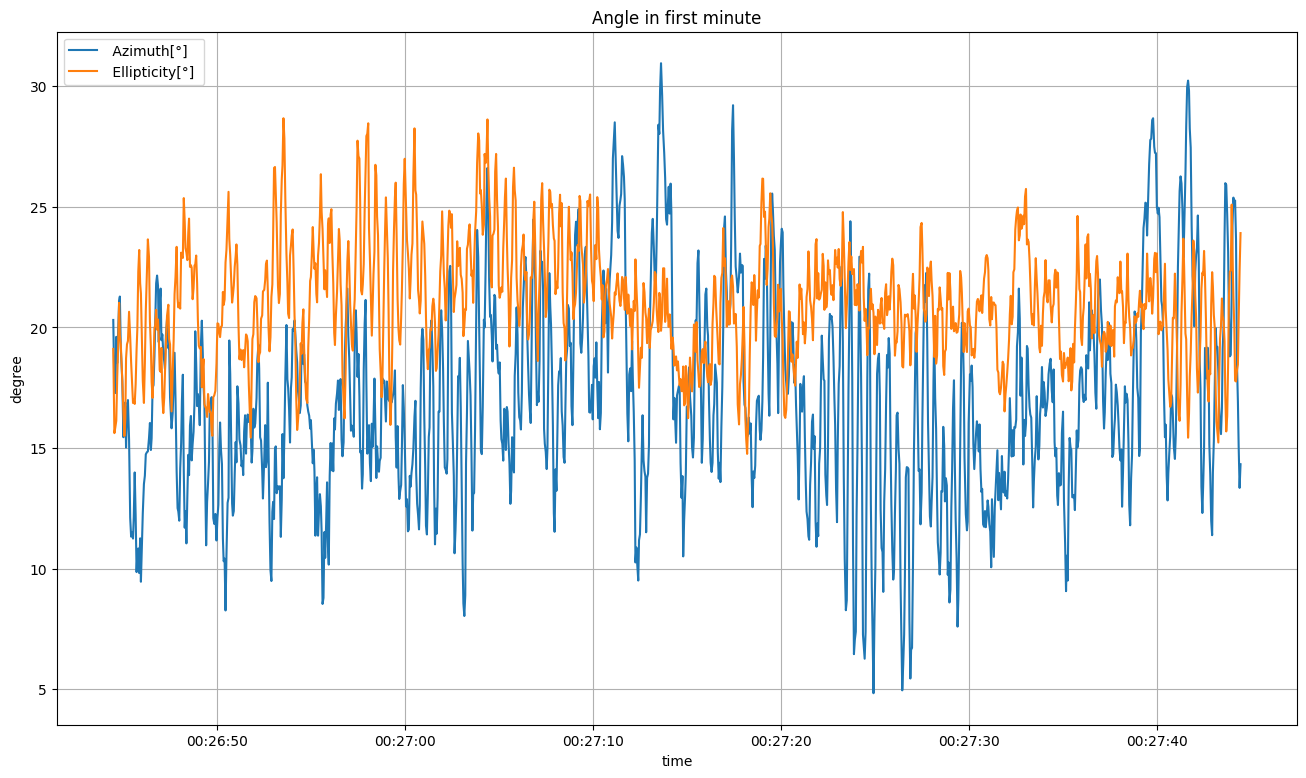

In [63]:
first_minute = angle.loc[(angle.index >= start_time) & (angle.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[9]], label = columns[9])
plt.plot(first_minute.index, first_minute[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first minute')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

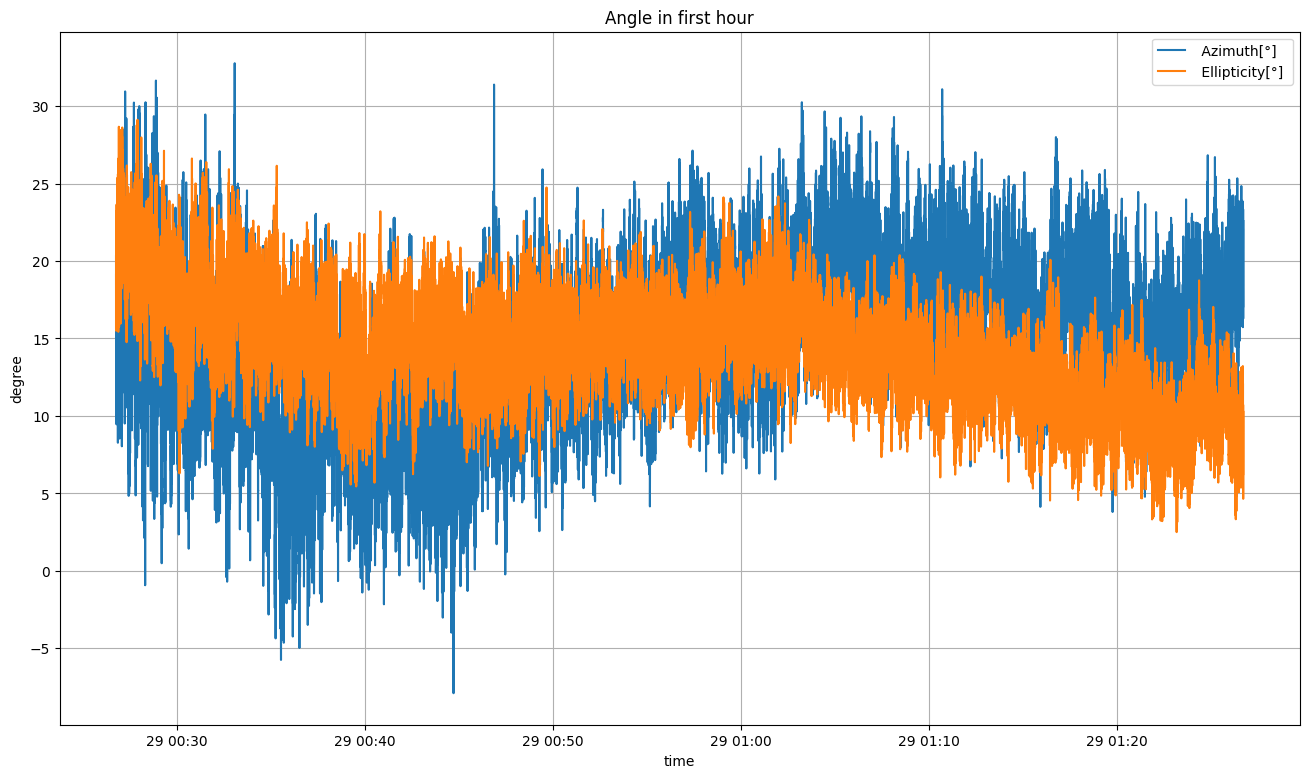

In [64]:
first_hour = angle.loc[(angle.index >= start_time) & (angle.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[9]], label = columns[9])
plt.plot(first_hour.index, first_hour[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first hour')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

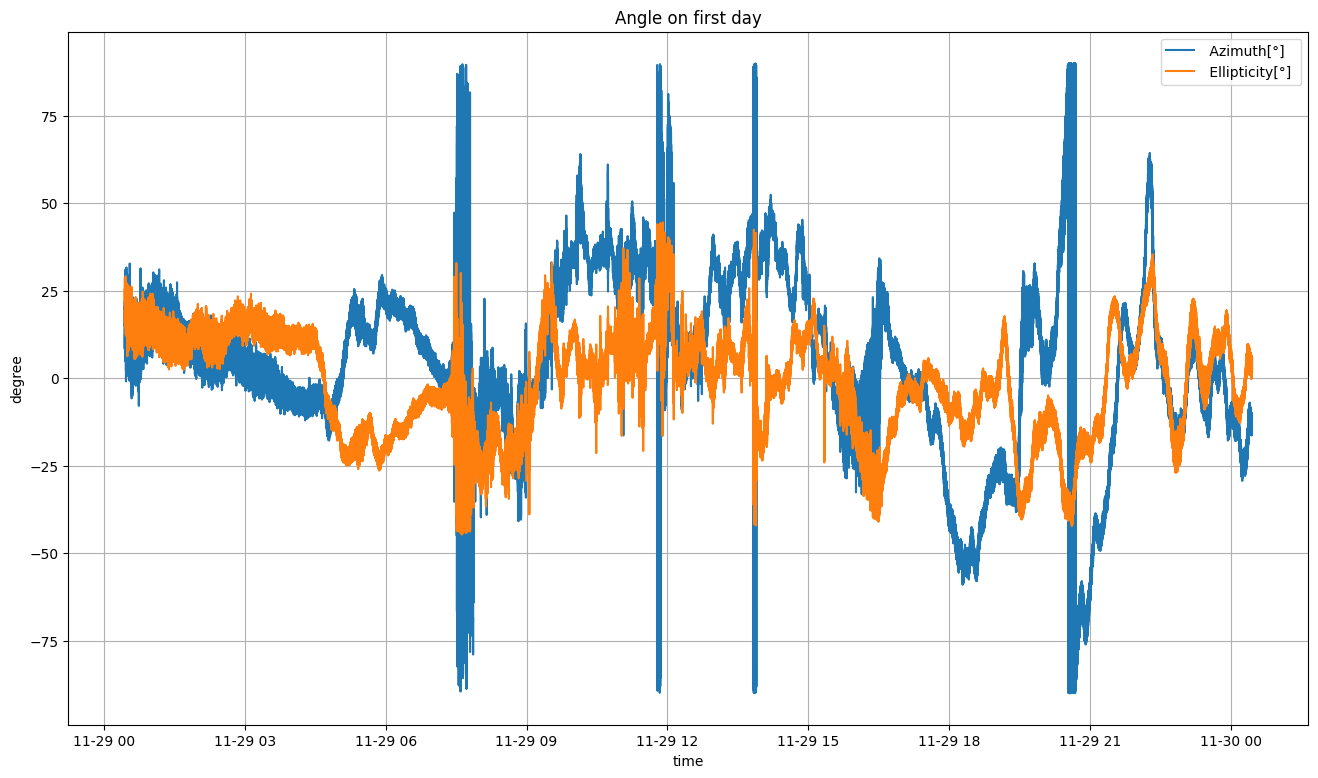

In [65]:
first_day = angle.loc[(angle.index >= start_time) & (angle.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[9]], label = columns[9])
plt.plot(first_day.index, first_day[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle on first day')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

In [66]:
angle_seconds_resample = angle.resample('s').mean()

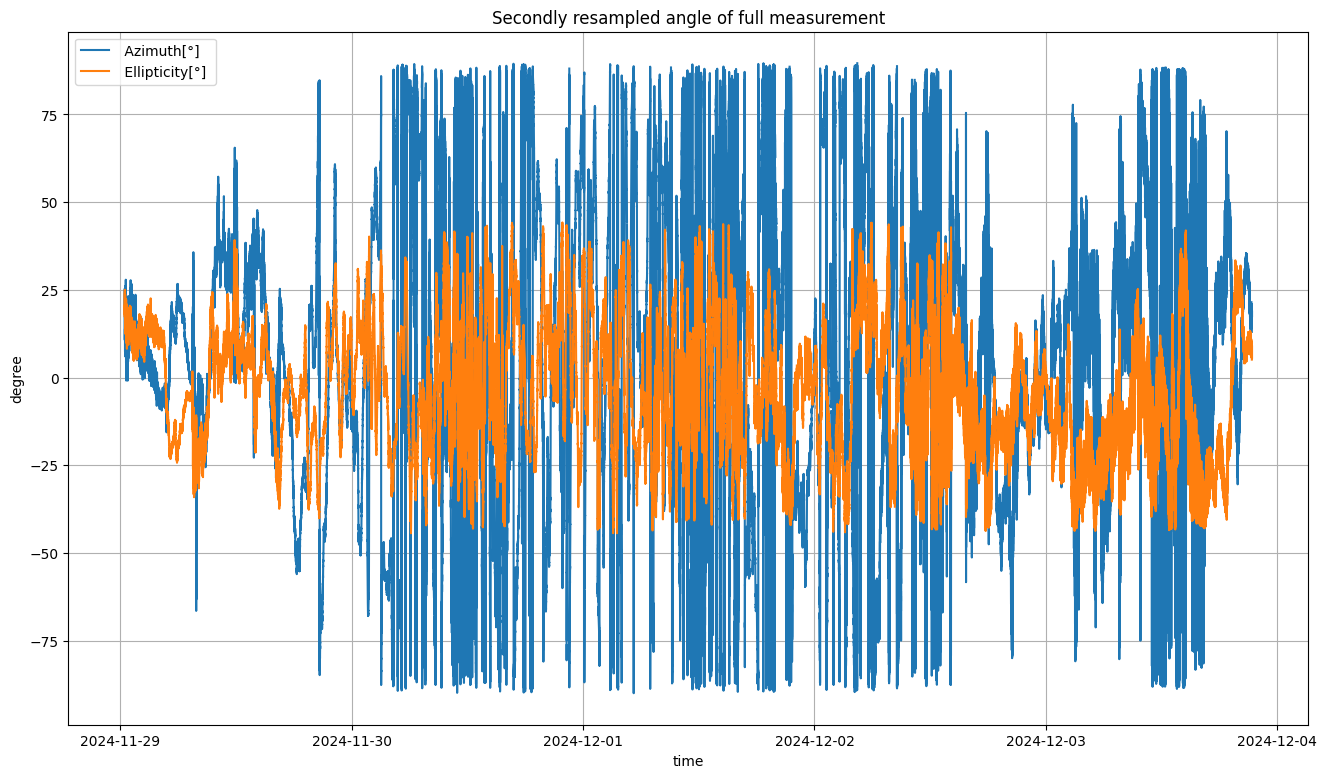

In [67]:
plt.figure(figsize = (16,9))
plt.plot(angle_seconds_resample.index, angle_seconds_resample[columns[9]], label = columns[9])
plt.plot(angle_seconds_resample.index, angle_seconds_resample[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled angle of full measurement')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

## Stokes-Parameter (S0, S1, S2, S3 / Normalized S1, S2, S3)

In [68]:
stokes = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[5], columns[6], columns[7], columns[8]], sep=sep)

In [69]:
stokes[columns[0]] = pd.to_datetime(stokes[columns[0]])
stokes.set_index(columns[0], inplace=True)

In [70]:
stokes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0    S 0 [mW]  float64
 1    S 1 [mW]  float64
 2    S 2 [mW]  float64
 3    S 3 [mW]  float64
dtypes: float64(4)
memory usage: 270.5 MB


In [71]:
stokes.isnull().sum()

S 0 [mW]    0
S 1 [mW]    0
S 2 [mW]    0
S 3 [mW]    0
dtype: int64

In [72]:
stokes.describe()

S 0 [mW]      S 1 [mW]      S 2 [mW]      S 3 [mW]
count  7.092298e+06  7.092298e+06  7.092298e+06  7.092298e+06
mean   2.386558e-01  4.826444e-02  1.702841e-02 -2.669778e-02
std    1.068249e-02  1.413223e-01  1.286800e-01  1.294159e-01
min   -2.843000e-04 -2.557000e-01 -2.594000e-01 -2.460000e-01
25%    2.331000e-01 -6.597000e-02 -8.226000e-02 -1.400000e-01
50%    2.393000e-01  8.051000e-02  2.759000e-02 -3.555000e-02
75%    2.450000e-01  1.711000e-01  1.209000e-01  8.157000e-02
max    2.754000e-01  2.572000e-01  2.684000e-01  2.430000e-01

In [73]:
normalized_stokes = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[2], columns[3], columns[4]], sep=sep)

In [74]:
normalized_stokes[columns[0]] = pd.to_datetime(normalized_stokes[columns[0]])
normalized_stokes.set_index(columns[0], inplace=True)

In [75]:
normalized_stokes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0    Normalized s 1   float64
 1    Normalized s 2   float64
 2    Normalized s 3   float64
dtypes: float64(3)
memory usage: 216.4 MB


In [76]:
normalized_stokes.isnull().sum()

Normalized s 1     0
Normalized s 2     0
Normalized s 3     0
dtype: int64

In [77]:
normalized_stokes.describe()

Normalized s 1   Normalized s 2   Normalized s 3 
count     7.092298e+06     7.092298e+06     7.092298e+06
mean      2.034914e-01     7.109757e-02    -1.129362e-01
std       5.928214e-01     5.405157e-01     5.451928e-01
min      -1.000000e+00    -1.000000e+00    -1.000000e+00
25%      -2.800000e-01    -3.500000e-01    -5.900000e-01
50%       3.400000e-01     1.200000e-01    -1.500000e-01
75%       7.200000e-01     5.100000e-01     3.400000e-01
max       1.000000e+00     1.000000e+00     1.000000e+00

## Power-Split-Ratio & Phase Difference

In [78]:
modality = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[20], columns[21]], sep=sep)

In [79]:
modality[columns[0]] = pd.to_datetime(modality[columns[0]])
modality.set_index(columns[0], inplace=True)

In [80]:
modality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7092298 entries, 2024-11-29 00:26:44.470000 to 2024-12-03 21:24:03.030000
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0    Power-Split-Ratio     float64
 1    Phase Difference[°]   float64
dtypes: float64(2)
memory usage: 162.3 MB


In [81]:
modality.isnull().sum()

Power-Split-Ratio       0
Phase Difference[°]     0
dtype: int64

In [82]:
modality.describe()

Power-Split-Ratio   Phase Difference[°] 
count        7.092298e+06          7.092298e+06
mean         6.017494e-01         -1.623205e+01
std          2.964305e-01          9.624108e+01
min          0.000000e+00         -1.800000e+02
25%          3.600000e-01         -9.366000e+01
50%          6.700000e-01         -2.880000e+01
75%          8.600000e-01          5.927000e+01
max          1.000000e+00          1.800000e+02

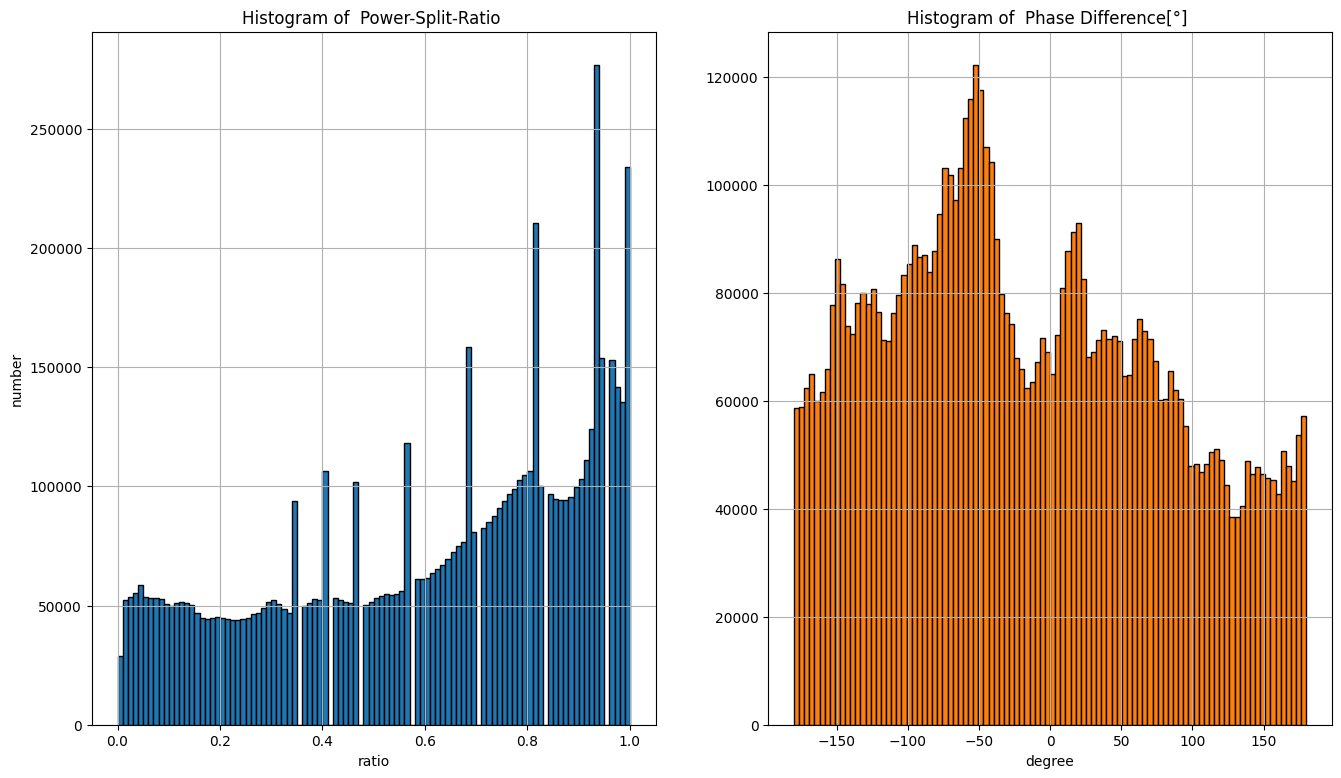

In [83]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(modality[columns[20]], bins=100, color='tab:blue', edgecolor='black')
plt.grid()
plt.xlabel('ratio')
plt.ylabel('number') 
plt.title(f'Histogram of {columns[20]}')

plt.subplot(1, 2, 2)
plt.hist(modality[columns[21]], bins=100, color='tab:orange', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.title(f'Histogram of {columns[21]}')

plt.show()

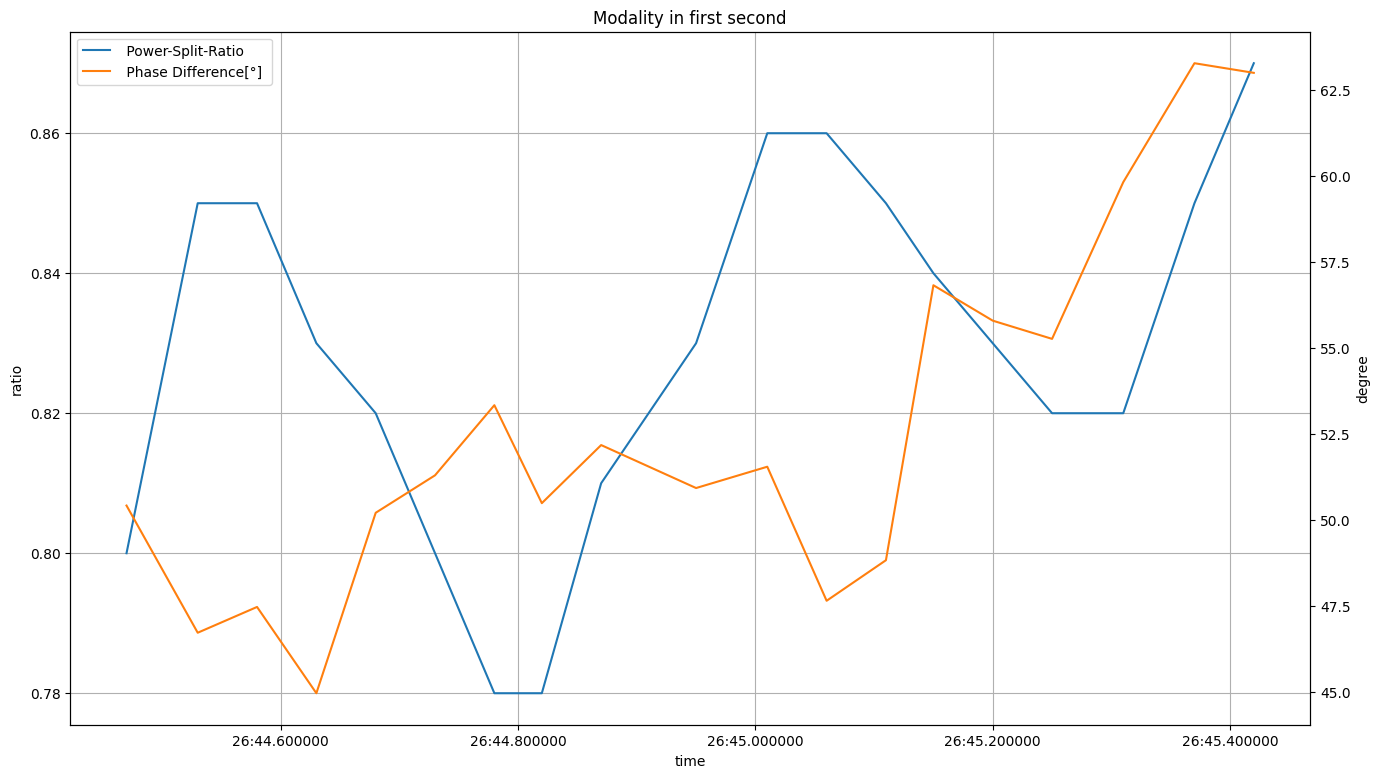

In [84]:
first_second = modality.loc[(modality.index >= start_time) & (modality.index < end_time_second)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_second.index, first_second[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_second.index, first_second[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first second')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

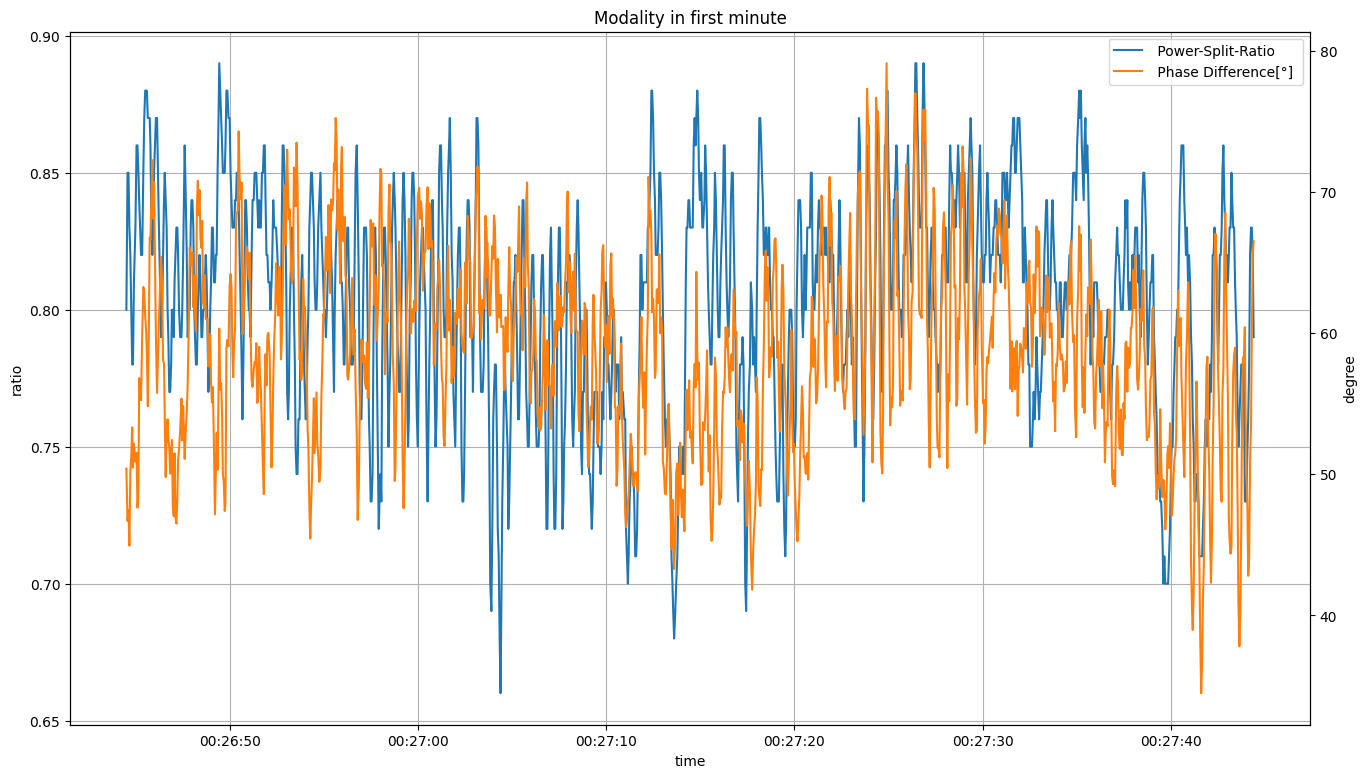

In [85]:
first_minute = modality.loc[(modality.index >= start_time) & (modality.index < end_time_minute)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_minute.index, first_minute[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_minute.index, first_minute[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first minute')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

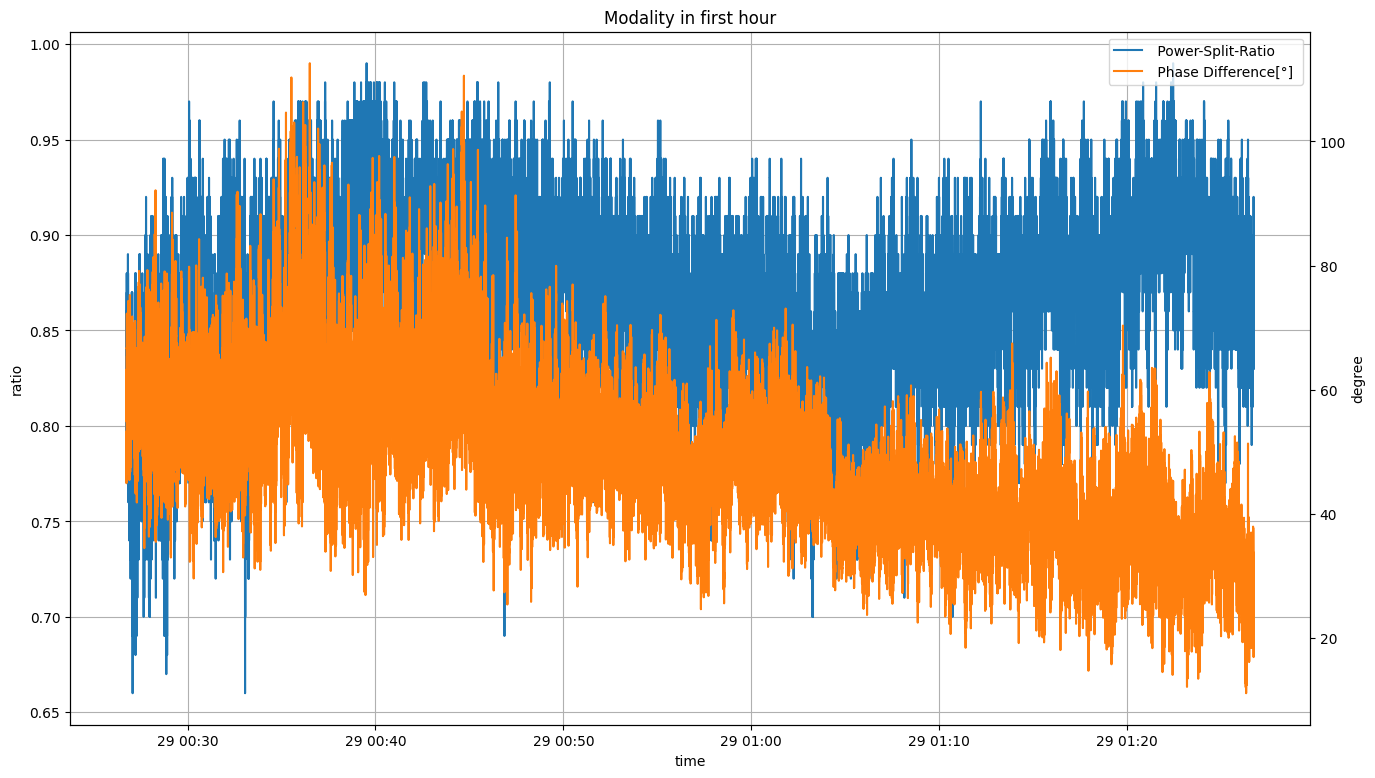

In [86]:
first_hour = modality.loc[(modality.index >= start_time) & (modality.index < end_time_hour)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_hour.index, first_hour[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_hour.index, first_hour[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first hour')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

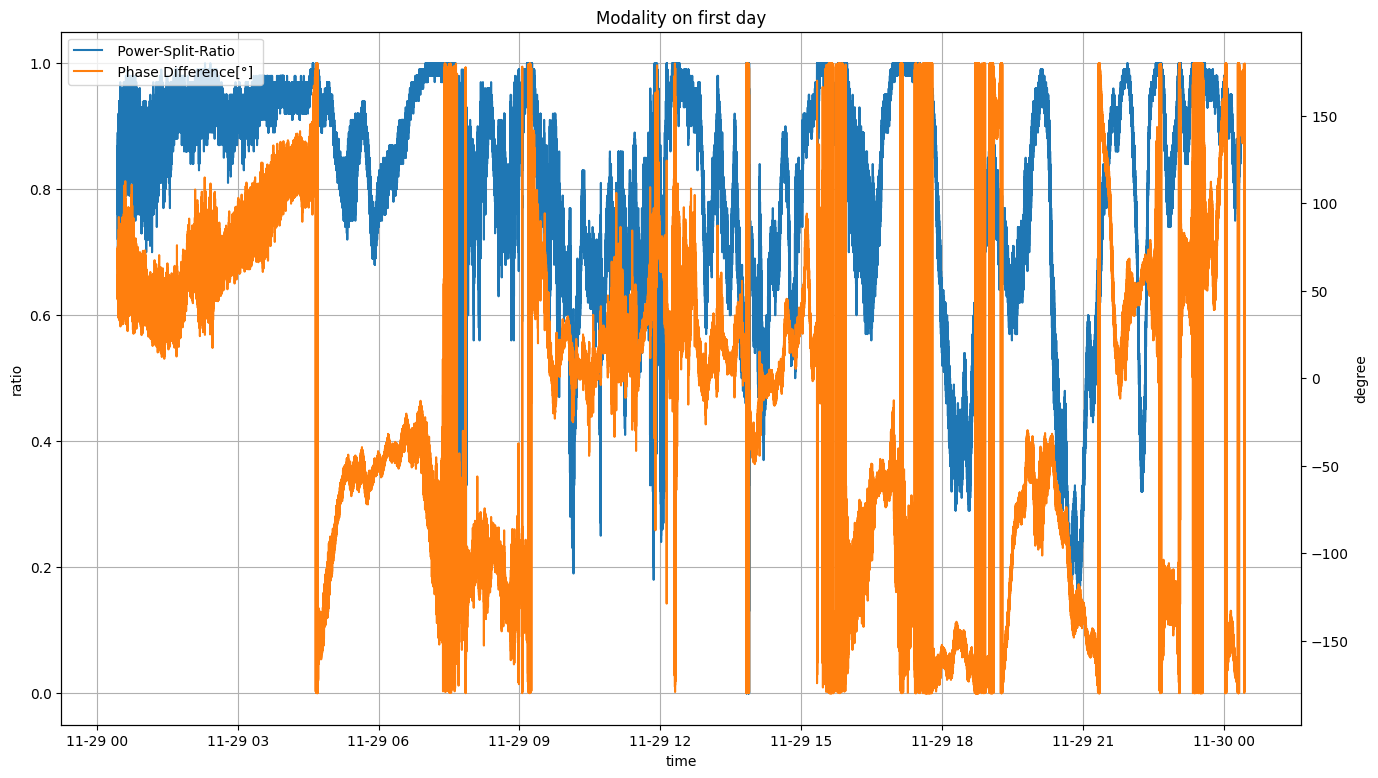

In [87]:
first_day = modality.loc[(modality.index >= start_time) & (modality.index < end_time_day)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_day.index, first_day[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_day.index, first_day[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality on first day')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

In [88]:
modality_seconds_resample = modality.resample('s').mean()

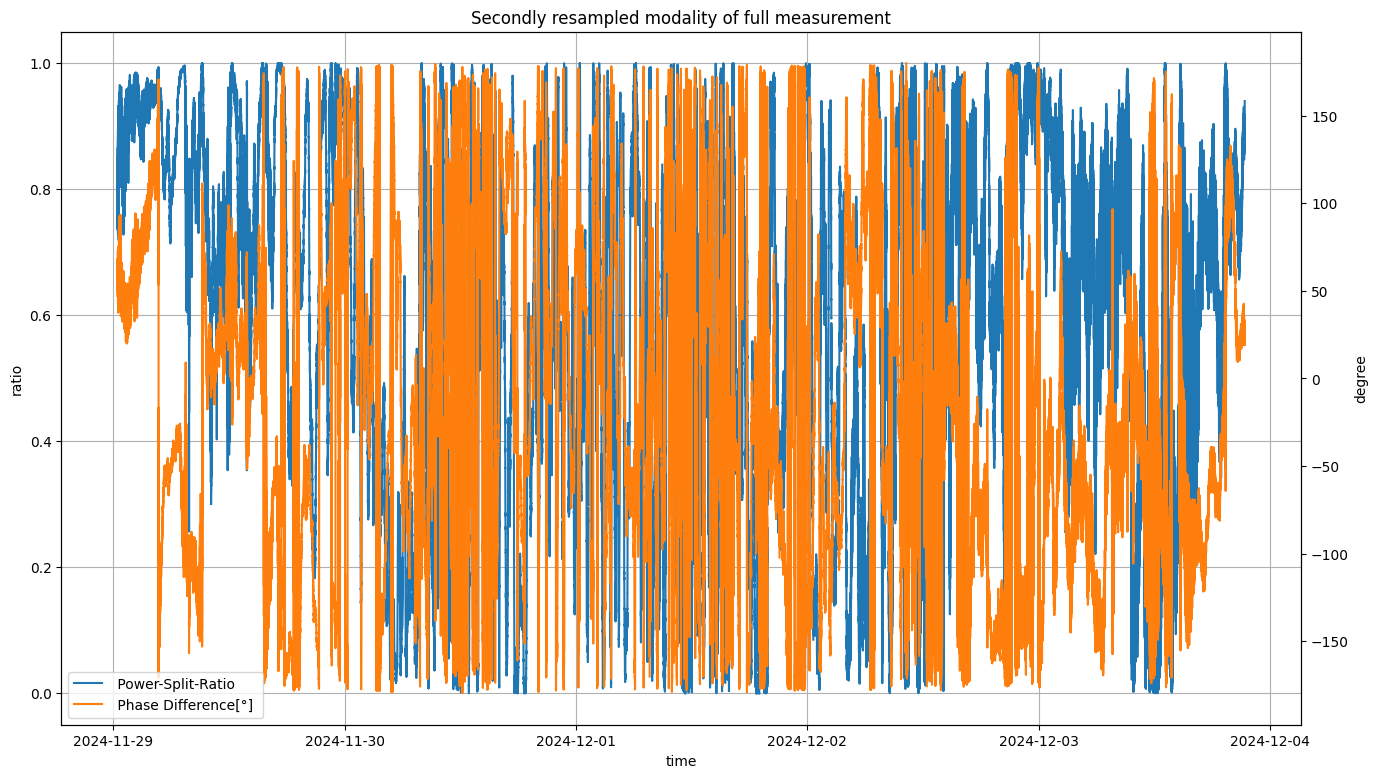

In [89]:
fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(modality_seconds_resample.index, modality_seconds_resample[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(modality_seconds_resample.index, modality_seconds_resample[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Secondly resampled modality of full measurement')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()